In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import jieba

#ÂøΩÁï•Ë≠¶Âëä
import warnings
warnings.filterwarnings("ignore")

### Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÈÉ®ÂàÜ

In [118]:
#ÂØºÂÖ•Ëû∫Ëõ≥Á≤âËØÑËÆ∫ÁöÑÊï∞ÊçÆ
comment1 = pd.read_csv('result.csv')
comments = pd.read_csv('ÊùéÂ≠êÊüíËû∫Ëõ≥Á≤âËØÑËÆ∫.csv')

# Êää‰∏§‰∏™Ë°®Ê†ºÂêàÂπ∂ÔºåÂπ∂‰∏îÈáçÊñ∞ËÆæÁΩÆÁ¥¢Âºï
comments1 = comments.append(comment1)
comments1.index = range(len(comments1))
#ÂéªÂêàÂπ∂Ë°®Ê†ºÁöÑÈáçÂ§çÂÄº
comments1.drop_duplicates(inplace=True)
#ÂéªÈáçÂ§çÂÄº
# print('commentsË°®ÂéªÈáçÂâçÁöÑÊï∞ÊçÆÈïøÂ∫¶Ôºö',len(comments))

comments.drop_duplicates(inplace=True)
# print('commentsË°®ÂéªÈáçÂêéÁöÑÊï∞ÊçÆÈïøÂ∫¶Ôºö',len(comments))

# print('comment1Ë°®ÂéªÈáçÂâçÁöÑÊï∞ÊçÆÈïøÂ∫¶Ôºö',len(comment1))
comment1.drop_duplicates(inplace=True)
# print('commentsË°®ÂéªÈáçÂêéÁöÑÊï∞ÊçÆÈïøÂ∫¶Ôºö',len(comments))

comments1


UserNick         comment_time  \
0       Â§™***4  2020-04-09 18:53:48   
1       Áßò***0  2020-04-10 13:33:19   
2       m***3  2020-04-11 16:57:29   
3       Áà±***6  2020-04-10 17:52:28   
4       t***2  2020-04-11 18:39:50   
...       ...                  ...   
3975    g***ÂÑø      2021/5/14 22:49   
3976    Êò•***Â®¥      2021/5/11 11:55   
3977    Êõπ***0      2021/5/10 20:48   
3978    t***3       2021/5/7 10:48   
3979    ÂøÉ***Ë¥ù       2021/5/8 23:28   

                                                content  \
0     Êï¥‰ΩìËØÑ‰ª∑ÔºöËøò‰∏çÈîôÂë¶Ôºå‰∏úË•øËõÆÂ•ΩÁöÑÔºåÁ¨¨‰∏ÄÊ¨°‰π∞ÊùéÂ≠êÊüíÂÆ∂‰∏úË•øÂëÄÔºå‰∏çÈîôÂëÄÔºåÊ£íÊ£íÂìí ËÉÄÂåÖÈóÆÈ¢òÔºöÊ≤°ÊúâÂëÄÔºåÂåÖ...   
1     ÔºÉÊüíÂÆ∂ÁæéÊãçËææ‰∫∫ÔºÉÂΩìÂêÉÂà∞ÊùéÂ≠êÊüíÂÆ∂Á¨¨‰∏ÄÂè£Ëû∫ÁãÆÁ≤âÁöÑÊó∂ÂÄôÔºåÂè™ÊÉ≥ËØ¥ÔºåÊº´ÈïøÁöÑÁ≠âÂæÖÊòØÂÄºÂæóÁöÑüòÅÁ±≥Á≤âÁàΩÊªëQÂºπÔºå...   
2     Êï¥‰ΩìËØÑ‰ª∑Ôºö‰∏çÈîô ËÉÄÂåÖÈóÆÈ¢òÔºöÊó† ÂåÖË£ÖÂìÅË¥®ÔºöÂ•Ω Âè£ÊÑüÂë≥ÈÅìÔºöËæ£Ê§íÂçäÂåÖÂ∞±Â§ü‰∫ÜÔºåÊå∫È¶ôÁöÑ Êñ∞È≤úÂ∫¶ÔºöÂèØ‰ª• ...   
3     #ÊüíÂÆ∂ÁæéÊãçËææ‰∫∫# Á≠âÂæÖ‰∫ÜÂ•Ω‰πÖÁöÑÁæéÈ£üÁªà‰∫éÂà∞‰∫ÜÔºåÂèØ‰ª•ËØ¥ÊúüÂæÖ‰∫ÜÂæà‰πÖÔºåÊãøÂà∞ÂêéÊøÄÂä®‰∫ÜÂæà‰πÖÔºåÊÉ≥ÁùÄ‰∏ÄÂÆöÁªôÊüí...   
4     3 Êúà11 Âè∑‰∏ãÂçïÔºå4Êúà11 Âè∑Êî∂Âà∞ÁöÑÔºåÂìàÂìàÂìàÂìà ‰∏çÊÑßÊòØÊàëÁ≠â‰∫Ü‰∏Ä‰∏™ÊúàÁöÑËû∫Ëõ≥Á≤âÔºåÂ•ΩÂêÉÂà∞ÁàÜÁÇ∏ÔºÅÔºÅ...   
...                                                 ...   
3975                                Â∑≤Áªè‰π∞‰∫ÜÂ•ΩÂá†Ê¨°‰∫ÜÔºåËøòÊòØ‰∏ÄÂ¶ÇÊó¢ÂæÄÁöÑÂ•ΩÂêÉüòã   
3976                                         ÂåÖË£ÖÂÆåÁæéÔºåÂ•ΩÂêÉ‰∏çË¥µÔºÅ   
3977                                       ÂñúÊ¨¢ÂñúÊ¨¢ÔºåÁ¨¶ÂêàÊàëÁöÑÂè£Âë≥üëç   
3978  Êï¥‰ΩìËØÑ‰ª∑ÔºöÂ•Ω„ÄÇ ËÉÄÂåÖÈóÆÈ¢òÔºöÊó† ÂåÖË£ÖÂìÅË¥®Ôºö‰∏•ÂÆûÔºåÂæàÂ•Ω„ÄÇ Âè£ÊÑüÂë≥ÈÅìÔºöÈÖ∏Ëæ£ÂèØÂè£ÔºåÂ∏åÊúõÈÖ∏Á¨ãÂ§ö‰∏ÄÁÇπ‰ºöÊõ¥ÂñúÊ¨¢ÔºÅ   
3979                              ÈùûÂ∏∏ÂñúÊ¨¢ÔºåÂë≥ÈÅìÂæàÊ≠£Ôºå‰ªΩÈáèÂæàË∂≥ÔºåÂ•ΩÂêÉÁöÑ‰∏çÂæó‰∫Ü   

                  auctionSku  
0                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö  
1                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö  
2                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö  
3                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö  
4                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö  
...                      ...  
3975  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã  
3976  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã  
3977  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã  
3978  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã  
3979  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã  

[3960 rows x 4 columns]

In [119]:
#ÂÅöÂá∫Ë°®‰∏≠ÁöÑËØÑËÆ∫ÁöÑÊó∂Èó¥Êï∞ÈáèÂõæ

#Â∞Ücomment_timeÈÇ£ÂàóËΩ¨Âåñ‰∏∫datatimeÊ†ºÂºè
comments1['comment_time'] = pd.to_datetime(comments1['comment_time'])

#Â∞ÜÊó∂Èó¥ÊÆµÂéªÊéâÔºåÂè™‰øùÁïôÂπ¥ÊúàÊó•

comments1['comment_date'] = comments1['comment_time'].dt.date

time_date = comments1['comment_date'].value_counts().sort_index()
# time_date.head(10)
# #ËßÇÂØü‰∏Ä‰∏ãÊú´Â∞æ10Êù°Êï∞ÊçÆ
# time_date.tail(10)


In [120]:
from pyecharts.charts import Line 
from pyecharts import options as opts 

#ÁîªÂá∫Êúà‰ªΩÁöÑÊó∂Èó¥Âõæ
line1 = Line(init_opts=opts.InitOpts(width='1000px', height='500px'))  # ÂàùÂßãÂåñÈÖçÁΩÆÔºåÁîªÂ∏ÉÁöÑÈïøÂ∫¶ÂíåÈ´òÂ∫¶
line1.add_xaxis(time_date.index.tolist())  # Áî®npÂ∫ìÊääÊó∂Èó¥Ë°®ÁöÑindexËΩ¨ÂåñÊàêÂàóË°®ÂΩ¢Âºè,‰º†ÂÖ•ÂÅö‰∏∫xÊ®™ÂùêÊ†á
line1.add_yaxis('ÁÉ≠Â∫¶', time_date.values.tolist(),  # Âõæ‰æãÔºå yËΩ¥Êï∞ÊçÆÔºå
                areastyle_opts=opts.AreaStyleOpts(opacity=0.5),   #ÂõæÂΩ¢ÈÄèÊòéÂ∫¶
                label_opts=opts.LabelOpts(is_show=True))
line1.set_global_opts(title_opts=opts.TitleOpts(title='ÂïÜÂìÅËØÑ‰ª∑Êï∞ÈáèËµ∞ÂäøÂõæ'), 
                      xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate='30')),  #xËΩ¥ÂàªÂ∫¶ÂÄæÊñú30Â∫¶
#                       toolbox_opts=opts.ToolboxOpts(), # Âè≥‰∏äËßíÁöÑÁªÑ‰ª∂ËÆæÁΩÆ
                      visualmap_opts=opts.VisualMapOpts(max_=350))  #ËßÜËßâÊò†Â∞ÑÈÖçÁΩÆ
line1.set_series_opts(linestyle_opts=opts.LineStyleOpts(width=3))
line1.render_notebook()

### ÊÉÖÊÑüÂàÜÊûêÈÉ®ÂàÜ


In [121]:
# ÊÉÖÊÑüÂàÜÊûê
'''ÂÆûÁé∞Ê≠•È™§Ôºö
    ‰ªé‰ª•‰∏ãÂá†‰∏™ËßíÂ∫¶ÂØπËØÑËÆ∫ËøõË°åÂàÜÊûêÔºöÂìÅÁâå„ÄÅÁâ©ÊµÅ„ÄÅÂåÖË£Ö„ÄÅ‰∫ßÂìÅÂéüÊñô„ÄÅÈ£üÁî®Âè£ÊÑü„ÄÅ‰øùË¥®Êúü„ÄÅÊÄß‰ª∑ÊØîÁ≠âÂá†‰∏™ÊñπÈù¢ËøõË°åÂàÜÊûê
    Áî®‰∏Ä‰∏™Êñ∞Ë°®Ê†ºÔºåÂØπÊÉÖÊÑüÊ≠£Ë¥üÈù¢ÊâìÂàÜÂπ∂‰∏îÊääÂæóÂàÜÂ≠òËøõÊù•„ÄÇ
    ‰ªé‰∏äËø∞Âá†‰∏™ËßíÂ∫¶ÂàÜÊûêÔºåÊØè‰∏™ËßíÂ∫¶ÈÉΩÂª∫‰∏Ä‰∏™ÊÉÖÊÑüËØçÂ∫ìÔºåÈÅçÂéÜÊØè‰∏™ËØçÂ∫ìÔºåÊâæÂà∞ËØÑËÆ∫‰∏≠Âê´ÊúâËØ•ËØçÂ∞±ËøõË°åÊâìÂàÜ
'''
# ÂàõÂª∫‰∏Ä‰∏™ÂáΩÊï∞Ôºå‰º†ËøõÂæÖÂ§ÑÁêÜÁöÑË°®Ê†ºÔºåËøõË°åÊÉÖÊÑüÊâìÂàÜÁªüËÆ°ÔºåÊúÄÁªàËøîÂõûÊâìÂàÜÂ•ΩÁöÑË°®ËøûÊé•Âú®ÂéüË°®ÂêéÈù¢
def set_comment(df, result):
    
    # ÂàõÂª∫‰∏Ä‰∏™Á©∫Ë°®
    new_form = pd.DataFrame(np.zeros(13 * len(comments)).reshape(len(comments),13),
                      columns = ['ÂìÅÁâå','Áâ©ÊµÅÊ≠£Èù¢','Áâ©ÊµÅË¥üÈù¢','ÂåÖË£ÖÊ≠£Èù¢','ÂåÖË£ÖË¥üÈù¢','ÂéüÊñôÊ≠£Èù¢',
                                 'ÂéüÊñôË¥üÈù¢','Âè£ÊÑüÊ≠£Èù¢','Âè£ÊÑüË¥üÈù¢','Êó•ÊúüÊ≠£Èù¢','Êó•ÊúüË¥üÈù¢',
                                 'ÊÄß‰ª∑ÊØîÊ≠£Èù¢','ÊÄß‰ª∑ÊØîË¥üÈù¢'])

    # ÂàõÂª∫ÊÉÖÁª™Ë°®ÔºåÂåÖÂê´Ê≠£Èù¢ÊÉÖÁª™1ÔºåË¥üÈù¢ÊÉÖÁª™0
    #ÂàõÂª∫ÂìÅÁâåË°®
    brand = ['ÊùéÂ≠êÊüí','Â≠êÊüí','Â∞èÊüí','ÊùéÂ≠ê‰∏É','Â∞è‰∏É']
    
    #ÂàõÂª∫Âø´ÈÄíË°®
    courier = ['Áâ©ÊµÅ','Âø´ÈÄí','ÈÖçÈÄÅ','ÂèñË¥ß','ÈÄÅË¥ß']
    courier1 = ['Âø´','‰∏çÈîô','Ê£í','Êª°ÊÑè','ËøÖÈÄü']
    courier0 = ['ÊÖ¢','ÈæüÈÄü','‰πÖ','Â∑Æ']
    
    #ÂàõÂª∫ÂåÖË£ÖË°®
    pack = ['ÂåÖË£Ö','ÁõíÂ≠ê','Ë¢ãÂ≠ê','Â§ñËßÇ','ËÉÄÂåÖ']
    pack1 = ['È´òÁ´Ø','Â§ßÊ∞î','ËøòË°å','ÂÆåÊï¥','Â•Ω','‰∏•ÂÆû','Á¥ß','Á≤æËá¥']
    pack0 = ['Á†¥','Á†¥Êçü','Áò™','ÁÆÄÈôã','‰∏ë','ÈöæÁúã','ÊºèÊ∞î']
    
    #ÂàõÂª∫ÂéüÊñô‰∫ßÂìÅË°®
    product = ['Á±≥Á≤â','Ê±§','ÈÖçÊñô','ËÖêÁ´π','Ëä±Áîü','ÈÖ∏Á¨ã']
    product1 = ['Âä≤ÈÅì','Â§ö','Ë∂≥','È¶ô','Êâç','ËÑÜ','nice']
    product0 = ['Â∞è','Â∞ë','Ê≤°']

    #ÂàõÂª∫Âè£ÊÑüË°®
    taste = ['Âè£Âë≥','Âë≥ÈÅì','Âè£ÊÑü','ÂêÉËµ∑Êù•']
    taste1 = ['Â•Ω','‰∏çÈîô','ÊµìÈ≤ú','ÂçÅË∂≥','È≤ú','ÂèØ‰ª•','ÂñúÊ¨¢','Á¨¶Âêà','ÈÄÇ‰∏≠']
    taste0 = ['‰∏çÂ•Ω','‰∏çË°å','‰∏çÈ≤ú']
    
    #ÂàõÂª∫‰øùË¥®ÊúüË°®
    shelf = ['‰øùË¥®Êúü','Êó•Êúü','Êó∂Èó¥']
        
    #ÂàõÂª∫ÊÄß‰ª∑ÊØîË°®,price1Ë°®Á§∫Ê≠£Èù¢ÊÉÖÁª™Ôºåprice0Ë°®Á§∫Ë¥üÈù¢ÊÉÖÁª™
    price1 = ['ÂàíÁÆó','‰æøÂÆú','Ëµö‰∫Ü','Âõ§Ë¥ß','Ë∂ÖÂÄº','Â§™ÂÄº','Áâ©Áæé‰ª∑Âªâ','ÂÆûÊÉ†','ÊÄß‰ª∑ÊØîÈ´ò','‰∏çË¥µ']
    price0 = ['Ë¥µ','‰∏çÂÄº','‰∫è‰∫Ü','‰∏çÂàíÁÆó','‰∏ç‰æøÂÆú','‰∏çÂÄº']
    
    for i in range(len(result)):
        word = result[i]
        #ÊùéÂ≠êÊüíÁöÑ‰∫ßÂìÅÂÖ∑ÊúâÂº∫IPÂ±ûÊÄßÔºåÂü∫Êú¨ÈÉΩÊòØÊ≠£Èù¢ËØÑ‰ª∑ÔºåËøôÈáå‰∏çÁªüËÆ°ÊÉÖÁª™ÔºåÂè™ÁªüËÆ°ÊèêÂèäÊ¨°Êï∞
        for j in brand:
            if j in word:
                new_form.iloc[i]['ÂìÅÁâå'] = 1

        #ÂÖàÂà§Êñ≠ÊòØ‰∏çÊòØÁâ©ÊµÅÁõ∏ÂÖ≥ÁöÑ         
        for j in courier:
            if j in word:
                #ÂÜçÂà§Êñ≠ÊòØÊ≠£Èù¢ËøòÊòØË¥üÈù¢ÊÉÖÊÑü
                for k in courier1:
                    if k in word:
                        new_form.iloc[i]['Áâ©ÊµÅÊ≠£Èù¢'] = 1
                    for l in courier0:
                        if l in word:
                            new_form.iloc[i]['Áâ©ÊµÅË¥üÈù¢'] = 1
                      
        #ÂÖàÂà§Êñ≠ÊòØ‰∏çÊòØÂåÖË£ÖÁõ∏ÂÖ≥ÁöÑ
        for j in pack:
            if j in word:
                #ÂÜçÂà§Êñ≠ÊòØÊ≠£Èù¢ËøòÊòØË¥üÈù¢ÊÉÖÊÑü
                for k in pack1:
                    if k in word:
                        new_form.iloc[i]['ÂåÖË£ÖÊ≠£Èù¢'] = 1
                    for l in pack0:
                        if l in word:
                            new_form.iloc[i]['ÂåÖË£ÖË¥üÈù¢'] = 1
                            
        #‰∫ßÂìÅÂéüÊñôÊÉÖÁª™ÔºåÂà§Êñ≠ÊòØ‰∏çÊòØÂéüÊñôÁõ∏ÂÖ≥
        for j in product:
            if j in word:
                #ÂÜçÂà§Êñ≠ÊòØÊ≠£Èù¢ËøòÊòØË¥üÈù¢ÊÉÖÊÑü
                for k in product1:
                    if k in word:
                        new_form.iloc[i]['ÂéüÊñôÊ≠£Èù¢'] = 1
                    for l in product0:
                        if l in word:
                            new_form.iloc[i]['ÂéüÊñôË¥üÈù¢'] = 1
                    
        #Âè£ÊÑüÁöÑÊÉÖÁª™ÔºåÂà§Êñ≠ÊòØ‰∏çÊòØÂè£ÊÑüÁõ∏ÂÖ≥
        for j in taste:
            if j in word:
                #ÂÜçÂà§Êñ≠ÊòØÊ≠£Èù¢ËøòÊòØË¥üÈù¢ÊÉÖÊÑü
                for k in taste1:
                    if k in word:
                        new_form.iloc[i]['Âè£ÊÑüÊ≠£Èù¢'] = 1
                    for l in taste0:
                        if l in word:
                            new_form.iloc[i]['Âè£ÊÑüË¥üÈù¢'] = 1

        #Âè£ÊÑüÊñπÈù¢ÔºåÊúâ‰∫õÊòØ‰∏çÈúÄË¶ÅÂá∫Áé∞ÂâçÁΩÆËØçÔºåÊ∂àË¥πËÄÖÁõ¥Êé•ËØÑ‰ª∑Â•ΩÂêÉÈöæÂêÉÁöÑÔºå‰æãÂ¶ÇÔºö
        if 'ÈöæÂêÉ' in word or '‰∏çÂ•ΩÂêÉ' in word:
            new_form.iloc[i]['Âè£ÊÑüË¥üÈù¢'] = 1
        elif 'Â•ΩÂêÉ' in word or 'È¶ô' in word:
            new_form.iloc[i]['Âè£ÊÑüÊ≠£Èù¢'] = 1
        
        #Êó•ÊúüÊòØ‰∏çÊòØÊñ∞È≤úÔºåÂÖàÂà§Êñ≠ËØçÊòØ‰∏çÂ±û‰∫é‰øùË¥®ÊúüÔºåÊó∂Èó¥ÔºåÊó•Êúü
        for j in shelf:
            if j in word:
                if 'Êñ∞È≤ú' in word:
                    new_form.iloc[i]['Êó•ÊúüÊ≠£Èù¢'] = 1
                elif '‰πÖ' in word or 'Èïø' in word:
                    new_form.iloc[i]['Êó•ÊúüË¥üÈù¢'] = 1
            #Ëã•ÊòØÊï¥Êù°ËØÑËÆ∫Âá∫Áé∞ËøáÊúüÔºåÁõ¥Êé•ÂΩí‰∏∫Ë¥üÈù¢„ÄÇ
            elif 'ËøáÊúü' in word:
                new_form.iloc[i]['Êó•ÊúüË¥üÈù¢'] = 1

        #ÊÄß‰ª∑ÊØîÔºåÂà§Êñ≠ÊòØÂú®Ê≠£Èù¢ÊÉÖÁª™
        for j in price1:
            if j in word: 
                new_form.iloc[i]['ÊÄß‰ª∑ÊØîÊ≠£Èù¢'] = 1
            #Âà§Êñ≠ÊòØÂú®Ë¥üÈù¢ÊÉÖÁª™
            for k in price0:
                if k in word:
                    new_form.iloc[i]['ÊÄß‰ª∑ÊØîË¥üÈù¢'] = 1
    
    final_result = pd.concat([df,new_form],axis = 1)   # ËøûÊé•DFË°®ÂíåÊâìÂàÜÂ•ΩÁöÑË°®ÔºåÊåâË°åËøû

    return final_result

In [122]:
# ËøôÈáåset_comment ÁöÑÂèÇÊï∞ÊòØ ÂéüÊù•ÁöÑË°®ÔºåÂíåÂéüÊù•ÁöÑË°®ÁöÑËØÑËÆ∫„ÄÇÊúÄÂêéÂæóÂá∫‰∏Ä‰∏™ËøûÊé•Â•ΩÊñ∞Ë°®
verdict1 = set_comment(comments, result=comments.content)
verdict2 = set_comment(comment1, result=comment1.content)
# Êää‰∏§‰∏™Ë°®Ê†ºÈáçÊñ∞ÂêàÂπ∂„ÄÇÂõ†‰∏∫‰∏äÈù¢ÂàÜÂà´Â§ÑÁêÜÁöÑ‰∏§‰∏™Êï∞ÊçÆÈõÜÔºåÊâÄ‰ª•‰∏∫Êõ¥Â•ΩÂú∞ËøõË°åÊÉÖÊÑüÂàÜÊûêÔºåÂÜçÂêàÂπ∂‰∏ÄÊ¨°
verdict  = verdict1.append(verdict2)
#ÈáçÊñ∞ËÆæÁΩÆÁ¥¢Âºï
verdict.index = range(len(verdict))
verdict

UserNick         comment_time  \
0       Â§™***4  2020-04-09 18:53:48   
1       Áßò***0  2020-04-10 13:33:19   
2       m***3  2020-04-11 16:57:29   
3       Áà±***6  2020-04-10 17:52:28   
4       t***2  2020-04-11 18:39:50   
...       ...                  ...   
3955    g***ÂÑø      2021/5/14 22:49   
3956    Êò•***Â®¥      2021/5/11 11:55   
3957    Êõπ***0      2021/5/10 20:48   
3958    t***3       2021/5/7 10:48   
3959    ÂøÉ***Ë¥ù       2021/5/8 23:28   

                                                content  \
0     Êï¥‰ΩìËØÑ‰ª∑ÔºöËøò‰∏çÈîôÂë¶Ôºå‰∏úË•øËõÆÂ•ΩÁöÑÔºåÁ¨¨‰∏ÄÊ¨°‰π∞ÊùéÂ≠êÊüíÂÆ∂‰∏úË•øÂëÄÔºå‰∏çÈîôÂëÄÔºåÊ£íÊ£íÂìí ËÉÄÂåÖÈóÆÈ¢òÔºöÊ≤°ÊúâÂëÄÔºåÂåÖ...   
1     ÔºÉÊüíÂÆ∂ÁæéÊãçËææ‰∫∫ÔºÉÂΩìÂêÉÂà∞ÊùéÂ≠êÊüíÂÆ∂Á¨¨‰∏ÄÂè£Ëû∫ÁãÆÁ≤âÁöÑÊó∂ÂÄôÔºåÂè™ÊÉ≥ËØ¥ÔºåÊº´ÈïøÁöÑÁ≠âÂæÖÊòØÂÄºÂæóÁöÑüòÅÁ±≥Á≤âÁàΩÊªëQÂºπÔºå...   
2     Êï¥‰ΩìËØÑ‰ª∑Ôºö‰∏çÈîô ËÉÄÂåÖÈóÆÈ¢òÔºöÊó† ÂåÖË£ÖÂìÅË¥®ÔºöÂ•Ω Âè£ÊÑüÂë≥ÈÅìÔºöËæ£Ê§íÂçäÂåÖÂ∞±Â§ü‰∫ÜÔºåÊå∫È¶ôÁöÑ Êñ∞È≤úÂ∫¶ÔºöÂèØ‰ª• ...   
3     #ÊüíÂÆ∂ÁæéÊãçËææ‰∫∫# Á≠âÂæÖ‰∫ÜÂ•Ω‰πÖÁöÑÁæéÈ£üÁªà‰∫éÂà∞‰∫ÜÔºåÂèØ‰ª•ËØ¥ÊúüÂæÖ‰∫ÜÂæà‰πÖÔºåÊãøÂà∞ÂêéÊøÄÂä®‰∫ÜÂæà‰πÖÔºåÊÉ≥ÁùÄ‰∏ÄÂÆöÁªôÊüí...   
4     3 Êúà11 Âè∑‰∏ãÂçïÔºå4Êúà11 Âè∑Êî∂Âà∞ÁöÑÔºåÂìàÂìàÂìàÂìà ‰∏çÊÑßÊòØÊàëÁ≠â‰∫Ü‰∏Ä‰∏™ÊúàÁöÑËû∫Ëõ≥Á≤âÔºåÂ•ΩÂêÉÂà∞ÁàÜÁÇ∏ÔºÅÔºÅ...   
...                                                 ...   
3955                                Â∑≤Áªè‰π∞‰∫ÜÂ•ΩÂá†Ê¨°‰∫ÜÔºåËøòÊòØ‰∏ÄÂ¶ÇÊó¢ÂæÄÁöÑÂ•ΩÂêÉüòã   
3956                                         ÂåÖË£ÖÂÆåÁæéÔºåÂ•ΩÂêÉ‰∏çË¥µÔºÅ   
3957                                       ÂñúÊ¨¢ÂñúÊ¨¢ÔºåÁ¨¶ÂêàÊàëÁöÑÂè£Âë≥üëç   
3958  Êï¥‰ΩìËØÑ‰ª∑ÔºöÂ•Ω„ÄÇ ËÉÄÂåÖÈóÆÈ¢òÔºöÊó† ÂåÖË£ÖÂìÅË¥®Ôºö‰∏•ÂÆûÔºåÂæàÂ•Ω„ÄÇ Âè£ÊÑüÂë≥ÈÅìÔºöÈÖ∏Ëæ£ÂèØÂè£ÔºåÂ∏åÊúõÈÖ∏Á¨ãÂ§ö‰∏ÄÁÇπ‰ºöÊõ¥ÂñúÊ¨¢ÔºÅ   
3959                              ÈùûÂ∏∏ÂñúÊ¨¢ÔºåÂë≥ÈÅìÂæàÊ≠£Ôºå‰ªΩÈáèÂæàË∂≥ÔºåÂ•ΩÂêÉÁöÑ‰∏çÂæó‰∫Ü   

                  auctionSku   ÂìÅÁâå  Áâ©ÊµÅÊ≠£Èù¢  Áâ©ÊµÅË¥üÈù¢  ÂåÖË£ÖÊ≠£Èù¢  ÂåÖË£ÖË¥üÈù¢  ÂéüÊñôÊ≠£Èù¢  ÂéüÊñôË¥üÈù¢  Âè£ÊÑüÊ≠£Èù¢  \
0                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö  1.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   
1                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö  1.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   
2                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö  0.0   0.0   0.0   1.0   0.0   1.0   1.0   1.0   
3                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö  1.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   
4                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö  0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   
...                      ...  ...   ...   ...   ...   ...   ...   ...   ...   
3955  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
3956  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã  0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   
3957  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
3958  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã  0.0   0.0   0.0   1.0   0.0   1.0   0.0   1.0   
3959  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

      Âè£ÊÑüË¥üÈù¢  Êó•ÊúüÊ≠£Èù¢  Êó•ÊúüË¥üÈù¢  ÊÄß‰ª∑ÊØîÊ≠£Èù¢  ÊÄß‰ª∑ÊØîË¥üÈù¢  
0      0.0   1.0   0.0    0.0    0.0  
1      0.0   0.0   0.0    0.0    0.0  
2      1.0   0.0   0.0    0.0    0.0  
3      0.0   0.0   0.0    0.0    0.0  
4      0.0   1.0   0.0    0.0    0.0  
...    ...   ...   ...    ...    ...  
3955   0.0   0.0   0.0    0.0    0.0  
3956   0.0   0.0   0.0    1.0    1.0  
3957   0.0   0.0   0.0    0.0    0.0  
3958   0.0   0.0   0.0    0.0    0.0  
3959   0.0   0.0   0.0    0.0    0.0  

[3960 rows x 17 columns]

In [123]:
#ÂØπ‰∏äË°®ËøõË°åÁªüËÆ°Â•ΩËØÑÂíåÂ∑ÆËØÑ„ÄÇÊâì‰∏äÊ†áÁ≠æÔºå‰æø‰∫éÂêéÈù¢ÁöÑÂàÜÁ±ª‰ΩøÁî®Áî®

sum1 = verdict[['UserNick','Áâ©ÊµÅÊ≠£Èù¢','ÂåÖË£ÖÊ≠£Èù¢','ÂéüÊñôÊ≠£Èù¢','Âè£ÊÑüÊ≠£Èù¢','Êó•ÊúüÊ≠£Èù¢','ÊÄß‰ª∑ÊØîÊ≠£Èù¢']]
sum1['Ê≠£Èù¢ÊÄªÂàÜ'] = sum1.iloc[:,1:6].sum(axis=1)    # ÂØπÊ≠£Èù¢ÁöÑÊÉÖÁª™ËøõË°åÊ±ÇÂíåÔºåÂπ∂Âä†‰∏ÄÂàóÂà∞sum1Ë°®ÂêéÈù¢

sum2 = verdict[['UserNick','Áâ©ÊµÅË¥üÈù¢','ÂåÖË£ÖË¥üÈù¢','ÂéüÊñôË¥üÈù¢','Âè£ÊÑüË¥üÈù¢','Êó•ÊúüË¥üÈù¢','ÊÄß‰ª∑ÊØîË¥üÈù¢']]
sum2['Ë¥üÈù¢ÊÄªÂàÜ'] = sum2.iloc[:,1:6].sum(axis=1)    # ÂØπË¥üÈù¢ÁöÑÊÉÖÁª™ËøõË°åÊ±ÇÂíåÔºåÂπ∂Âä†‰∏ÄÂàóÂà∞sum2Ë°®ÂêéÈù¢

sum1['Ë¥üÈù¢ÊÄªÂàÜ'] = sum2['Ë¥üÈù¢ÊÄªÂàÜ']   #  Âú®Ë°®sum1ÁöÑÂêéÈù¢Âä†‰∏äË¥üÈù¢ÊÄªÂàÜËøô‰∏ÄÂàó„ÄÇ sum1Ë°®ÈáåÂ∞±Êúâ‰∫ÜÊ≠£„ÄÅË¥üÈù¢ÊâìÂàÜÊ±áÊÄª‰∏§Âàó

#ËøõË°åÊâìÊ†áÁ≠æÔºåÂ¶ÇÊûúÊ≠£Èù¢ÊÄªÂàÜÂ§ß‰∫éË¥üÈù¢ÊÄªÂàÜÔºåËøôÂà§ÂÆö‰∏∫1ÔºåÂç≥Â•ΩËØÑ„ÄÇÂèç‰πãÂàô‰∏∫0
labels1 =  sum1.loc[lambda x:x['Ê≠£Èù¢ÊÄªÂàÜ']>x['Ë¥üÈù¢ÊÄªÂàÜ']]
labels1['label'] = 1
print('Â•ΩËØÑÁöÑÊÄªÊï∞Ôºö',len(labels1))
labels0 = sum1.loc[lambda x:x['Ê≠£Èù¢ÊÄªÂàÜ']<=x['Ë¥üÈù¢ÊÄªÂàÜ']]
labels0['label'] = 0
print('Â∑ÆËØÑÁöÑÊÄªÊï∞Ôºö',len(labels0))

data_label= labels1.append(labels0)

data_label.index = range(len(data_label))


data_label = data_label[['UserNick','label']]

#ÊääÊ†áÁ≠æÊ∑ªÂä†ËøõÂéªÈáçÁöÑË°®Ê†ºÈáåÈù¢,Âè™ÂèñÂÖ¨ÂÖ±ÈÉ®ÂàÜÔºåÊâÄ‰ª•Â∞ë‰∫Ü20Êù°Êï∞ÊçÆ„ÄÇËøôÈáåÂêàÂπ∂Â•ΩÁöÑÊï∞ÊçÆÂè™Áî®‰∏éÂêéÈù¢ÁöÑÂàÜÁ±ªÔºåËøô‰∏™comments1‰∏çÁî®‰∫éÊÉÖÊÑüÂàÜÊûê

comments1 = pd.concat([comments1,data_label],axis = 1,join = 'inner')
comments1.index = range(len(comments1))
comments1

Â•ΩËØÑÁöÑÊÄªÊï∞Ôºö 2892
Â∑ÆËØÑÁöÑÊÄªÊï∞Ôºö 1068


UserNick        comment_time  \
0       Â§™***4 2020-04-09 18:53:48   
1       Áßò***0 2020-04-10 13:33:19   
2       m***3 2020-04-11 16:57:29   
3       Áà±***6 2020-04-10 17:52:28   
4       t***2 2020-04-11 18:39:50   
...       ...                 ...   
3935    h***Âë® 2021-05-10 11:48:00   
3936    Ê¨ß***‰ºö 2021-05-19 11:18:00   
3937    r***8 2021-05-12 16:32:00   
3938    l***1 2021-04-25 13:44:00   
3939    ÊúÄ***8 2021-05-09 15:56:00   

                                                content  \
0     Êï¥‰ΩìËØÑ‰ª∑ÔºöËøò‰∏çÈîôÂë¶Ôºå‰∏úË•øËõÆÂ•ΩÁöÑÔºåÁ¨¨‰∏ÄÊ¨°‰π∞ÊùéÂ≠êÊüíÂÆ∂‰∏úË•øÂëÄÔºå‰∏çÈîôÂëÄÔºåÊ£íÊ£íÂìí ËÉÄÂåÖÈóÆÈ¢òÔºöÊ≤°ÊúâÂëÄÔºåÂåÖ...   
1     ÔºÉÊüíÂÆ∂ÁæéÊãçËææ‰∫∫ÔºÉÂΩìÂêÉÂà∞ÊùéÂ≠êÊüíÂÆ∂Á¨¨‰∏ÄÂè£Ëû∫ÁãÆÁ≤âÁöÑÊó∂ÂÄôÔºåÂè™ÊÉ≥ËØ¥ÔºåÊº´ÈïøÁöÑÁ≠âÂæÖÊòØÂÄºÂæóÁöÑüòÅÁ±≥Á≤âÁàΩÊªëQÂºπÔºå...   
2     Êï¥‰ΩìËØÑ‰ª∑Ôºö‰∏çÈîô ËÉÄÂåÖÈóÆÈ¢òÔºöÊó† ÂåÖË£ÖÂìÅË¥®ÔºöÂ•Ω Âè£ÊÑüÂë≥ÈÅìÔºöËæ£Ê§íÂçäÂåÖÂ∞±Â§ü‰∫ÜÔºåÊå∫È¶ôÁöÑ Êñ∞È≤úÂ∫¶ÔºöÂèØ‰ª• ...   
3     #ÊüíÂÆ∂ÁæéÊãçËææ‰∫∫# Á≠âÂæÖ‰∫ÜÂ•Ω‰πÖÁöÑÁæéÈ£üÁªà‰∫éÂà∞‰∫ÜÔºåÂèØ‰ª•ËØ¥ÊúüÂæÖ‰∫ÜÂæà‰πÖÔºåÊãøÂà∞ÂêéÊøÄÂä®‰∫ÜÂæà‰πÖÔºåÊÉ≥ÁùÄ‰∏ÄÂÆöÁªôÊüí...   
4     3 Êúà11 Âè∑‰∏ãÂçïÔºå4Êúà11 Âè∑Êî∂Âà∞ÁöÑÔºåÂìàÂìàÂìàÂìà ‰∏çÊÑßÊòØÊàëÁ≠â‰∫Ü‰∏Ä‰∏™ÊúàÁöÑËû∫Ëõ≥Á≤âÔºåÂ•ΩÂêÉÂà∞ÁàÜÁÇ∏ÔºÅÔºÅ...   
...                                                 ...   
3935                                          ÈÖçËèúÂæàÂ§ö‰∏çÈîôÂñúÊ¨¢ÂêÉ   
3936                                      Âàö‰π∞ÂÆåÂ∞±Èôç‰ª∑ Ëøô‰πüÂ§™ÈÄó‰∫ÜÂêß   
3937                                       ‰π∞‰∫ÜÂá†Ê¨°‰∫ÜÔºåÂë≥ÈÅìÁúüÁöÑÂæàÂ•Ω   
3938  MKËÇöÂ≠êÈ•øÁöÑÊó∂ÂÄô‰∏ç‚úÇÊÉ≥ÂÅöÈ•≠Â∞±ÁÖÆÁÖÆËû∫Ëõ≥Á≤âÂêÉ,üìâÊúâÁÇπÁîú,ËÑÜ‰∏≠Â∏¶Èüß„ÄÇÂàÜüìàÈáèË∂≥,ÂæàËæ£,Êç¢ÊàêÊúâÊ±§üì≠ÁöÑ‰πü...   
3939                                        ÈáèÂæàË∂≥ÔºåÂë≥ÈÅìËøòÊòØ‰∏çÈîôÂì¶   

                  auctionSku comment_date UserNick  label  
0                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö   2020-04-09    Â§™***4      1  
1                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö   2020-04-10    Áßò***0      1  
2                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö   2020-04-11    m***3      1  
3                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö   2020-04-10    Áà±***6      1  
4                  Âè£Âë≥:Ëû∫Ëõ≥Á≤â3Ë¢ãË£Ö   2020-04-11    t***2      1  
...                      ...          ...      ...    ...  
3935  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã   2021-05-10    t***6      0  
3936  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã   2021-05-19    t***6      0  
3937  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã   2021-05-12    x***Âí©      0  
3938  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã   2021-04-25    j***n      0  
3939  Âè£Âë≥:„ÄêÈ≤úËæ£ÈÖ∏ÁàΩÁÉ´ „Äë Ëû∫Ëõ≥Á≤â335g*3Ë¢ã   2021-05-09    ÂøÉ***4      0  

[3940 rows x 7 columns]

In [124]:
#ÂØπÂâçÈù¢ÊÉÖÊÑüÊâìÂàÜÁöÑË°®ËøõË°åÁªìÊûúÊ±áÊÄª
#‰ªéverdictË°®‰∏≠Á¨¨ÂõõÂàóÔºåÂç≥ÂìÅÁâåÈÇ£‰∏ÄÂàóÂºÄÂßãÂèñÂà∞Êú´Â∞æÈÇ£ÂàóÔºåÂπ∂‰∏îÂú®ÂØπÊØè‰∏ÄË°åÁöÑÂêÑÂàóÂÄºÊ±ÇÂíå
rank = verdict.iloc[:,4:].sum().reset_index().sort_values(0,ascending=False)
rank.columns = ['ÂàÜÁ±ª', 'ÊèêÂèäÊ¨°Êï∞']
rank['Âç†ÊØî'] = rank['ÊèêÂèäÊ¨°Êï∞'] / rank['ÊèêÂèäÊ¨°Êï∞'].sum()   # ËøôÈáåÁöÑÂç†ÊØîÊòØÂçï‰∏™Ê¨°Êï∞/ÊÄªÁöÑÊ¨°Êï∞
rank['Á±ªÂà´'] = rank['ÂàÜÁ±ª'].str[:-2]  # ÊääÁ±ªÂà´Ëøô‰∏ÄÂàóÁªôË°•‰∏äÔºåÈô§‰∫ÜÂìÅÁâåÊ≤°ÊúâÁ±ªÂà´

# ÊääÂàÜÁ±ª‰∏≠ÂìÅÁâåÁöÑÈÇ£‰∏ÄË°åÁöÑÁ±ªÂà´ÔºåÂÜçÊ∑ªÂä†‰∏∫‚ÄúÂìÅÁâå‚Äù
rank.loc[0, 'Á±ªÂà´'] = 'ÂìÅÁâå'
rank

ÂàÜÁ±ª    ÊèêÂèäÊ¨°Êï∞        Âç†ÊØî   Á±ªÂà´
7    Âè£ÊÑüÊ≠£Èù¢  2840.0  0.428550   Âè£ÊÑü
3    ÂåÖË£ÖÊ≠£Èù¢   879.0  0.132639   ÂåÖË£Ö
5    ÂéüÊñôÊ≠£Èù¢   804.0  0.121322   ÂéüÊñô
0      ÂìÅÁâå   706.0  0.106534   ÂìÅÁâå
6    ÂéüÊñôË¥üÈù¢   488.0  0.073638   ÂéüÊñô
11  ÊÄß‰ª∑ÊØîÊ≠£Èù¢   261.0  0.039384  ÊÄß‰ª∑ÊØî
9    Êó•ÊúüÊ≠£Èù¢   217.0  0.032745   Êó•Êúü
1    Áâ©ÊµÅÊ≠£Èù¢   139.0  0.020975   Áâ©ÊµÅ
10   Êó•ÊúüË¥üÈù¢    77.0  0.011619   Êó•Êúü
8    Âè£ÊÑüË¥üÈù¢    70.0  0.010563   Âè£ÊÑü
12  ÊÄß‰ª∑ÊØîË¥üÈù¢    69.0  0.010412  ÊÄß‰ª∑ÊØî
4    ÂåÖË£ÖË¥üÈù¢    39.0  0.005885   ÂåÖË£Ö
2    Áâ©ÊµÅË¥üÈù¢    38.0  0.005734   Áâ©ÊµÅ

In [125]:
# ËøõË°åÂêÑ‰∏™Á±ªÂà´ÁöÑÊ±áÊÄªÂπ∂ÊéíÂ∫è
rank_number = rank.groupby('Á±ªÂà´')['ÊèêÂèäÊ¨°Êï∞'].sum().sort_values(ascending=False)
# Êää‰∏äÈù¢ÁöÑÁªìÊûúËΩ¨ÂåñÊàê‰∫åÁª¥ÂàóË°®
data_pair = [list(z) for z in zip(rank_number.index,rank_number.values)]
data_pair

[['Âè£ÊÑü', 2910.0],
 ['ÂéüÊñô', 1292.0],
 ['ÂåÖË£Ö', 918.0],
 ['ÂìÅÁâå', 706.0],
 ['ÊÄß‰ª∑ÊØî', 330.0],
 ['Êó•Êúü', 294.0],
 ['Áâ©ÊµÅ', 177.0]]

In [126]:
#Êé•‰∏ãÊù•ÁîªÂõæÔºåÁªìÊûúÊï∞ÊçÆÂèØËßÜÂåñ

from pyecharts.charts import Pie 

pie1 = Pie(init_opts=opts.InitOpts(width='800px', height='500px'))
pie1.add( 
        series_name="numbers",
        radius=["35%", "65%"], # ÁéØÁöÑÂÜÖÔºåÂ§ñÂçäÂæÑ
        data_pair=data_pair, #Á≥ªÂàóÊï∞ÊçÆÈ°π
        label_opts=opts.LabelOpts(
            position="outside",  # Êï∞ÊçÆÂú®ÂúÜÂúàÂ§ñ
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",    #Ê†ºÂºèÂåñÁ®ãÂ∫è
            background_color="#eee",   #ËÉåÊôØÈ¢úËâ≤
            border_color="#aaa",     #ËæπÊ°ÜÈ¢úËâ≤
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
)
pie1.set_global_opts(legend_opts=opts.LegendOpts(pos_left="left", pos_top='25%',      #Âõæ‰æãÁªÑ‰ª∂Á¶ªÂÆπÂô®Â∑¶‰æßÔºå‰∏ä‰æßÁöÑË∑ùÁ¶ª
                                                 orient="vertical"),              #  Âõæ‰æãÂàóË°®ÁöÑÂ∏ÉÂ±ÄÊúùÂêëÔºåÁ∫µÂêë
                     toolbox_opts=opts.ToolboxOpts(),    #Âè≥‰∏äËßíÂ∑•ÂÖ∑ÁÆ±ËÆæÁΩÆ
                     title_opts=opts.TitleOpts(title='Ê∂àË¥πËÄÖÂÖ≥Ê≥®Âç†ÊØîÂàÜÂ∏É'))
pie1.set_series_opts(
    tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)")   #   formatterË°®Á§∫ Á≥ªÂàóÂêçÔºåÊï∞ÊçÆÈ°πÂêçÔºåÊï∞ÂÄºÔºåÁôæÂàÜÊØî
    )
pie1.render_notebook()

In [127]:
#ËÆ°ÁÆóÂêÑÈ°πÊÉÖÊÑüÁöÑÊ≠£Èù¢Âç†ÊÄªÊØî‰æãÂíåË¥üÈù¢ÊÄªÊØî‰æã
#ËΩ¨Êç¢Â≠óÁ¨¶‰∏≤ÔºåÂÜçÂà§Âà´ÊòØÂê¶ÂåÖÂê´‚ÄúÊ≠£‚Äù
list1 =rank[rank['ÂàÜÁ±ª'].str.contains('Ê≠£')]  # ËÆ©rankË°®ÈáåÈù¢ÁöÑÊ≠£Èù¢ËØÑËÆ∫ÈÉΩÊèêÂá∫Êù•ÔºåÂ≠òÂà∞list1ÈáåÈù¢
list2 =rank[rank['ÂàÜÁ±ª'].str.contains('Ë¥ü')]

#ËøûÊé•Âè™ÊúâÊ≠£ÔºåË¥üÈù¢ËØÑËÆ∫ÁöÑ‰∏§‰∏™Ë°®ÔºåÂêàÂπ∂
list3 = pd.merge(list1,list2,left_on = 'Á±ªÂà´',right_on='Á±ªÂà´')

# ÊääÊØèË°åÔºàÊØè‰∏™Á±ªÂà´ÔºâÊ≠£ÔºåË¥üÈù¢ÊèêÂèäÁöÑÊï∞ÈáèÊ±ÇÂíåÔºå
list3['ÊèêÂèäÊÄªÊï∞'] = list3['ÊèêÂèäÊ¨°Êï∞_x']+list3['ÊèêÂèäÊ¨°Êï∞_y']
list3["Ê≠£Èù¢Âç†ÊÄªÊØî‰æã"] = list3['ÊèêÂèäÊ¨°Êï∞_x']/list3['ÊèêÂèäÊÄªÊï∞']   # ËÆ°ÁÆóÊ≠£Èù¢Âç†ÊØî
list3["Ë¥üÈù¢Âç†ÊÄªÊØî‰æã"] = list3['ÊèêÂèäÊ¨°Êï∞_y']/list3['ÊèêÂèäÊÄªÊï∞']
list3 = list3[['Á±ªÂà´','ÊèêÂèäÊÄªÊï∞','ÂàÜÁ±ª_x','ÊèêÂèäÊ¨°Êï∞_x','Ê≠£Èù¢Âç†ÊÄªÊØî‰æã','ÂàÜÁ±ª_y','ÊèêÂèäÊ¨°Êï∞_y','Ë¥üÈù¢Âç†ÊÄªÊØî‰æã']]   #ÊääË°®ÁöÑÂàó‰ªéÊñ∞ÊéíÁâàÊ¨°Â∫è
list3

Á±ªÂà´    ÊèêÂèäÊÄªÊï∞   ÂàÜÁ±ª_x  ÊèêÂèäÊ¨°Êï∞_x    Ê≠£Èù¢Âç†ÊÄªÊØî‰æã   ÂàÜÁ±ª_y  ÊèêÂèäÊ¨°Êï∞_y    Ë¥üÈù¢Âç†ÊÄªÊØî‰æã
0   Âè£ÊÑü  2910.0   Âè£ÊÑüÊ≠£Èù¢  2840.0  0.975945   Âè£ÊÑüË¥üÈù¢    70.0  0.024055
1   ÂåÖË£Ö   918.0   ÂåÖË£ÖÊ≠£Èù¢   879.0  0.957516   ÂåÖË£ÖË¥üÈù¢    39.0  0.042484
2   ÂéüÊñô  1292.0   ÂéüÊñôÊ≠£Èù¢   804.0  0.622291   ÂéüÊñôË¥üÈù¢   488.0  0.377709
3  ÊÄß‰ª∑ÊØî   330.0  ÊÄß‰ª∑ÊØîÊ≠£Èù¢   261.0  0.790909  ÊÄß‰ª∑ÊØîË¥üÈù¢    69.0  0.209091
4   Êó•Êúü   294.0   Êó•ÊúüÊ≠£Èù¢   217.0  0.738095   Êó•ÊúüË¥üÈù¢    77.0  0.261905
5   Áâ©ÊµÅ   177.0   Áâ©ÊµÅÊ≠£Èù¢   139.0  0.785311   Áâ©ÊµÅË¥üÈù¢    38.0  0.214689

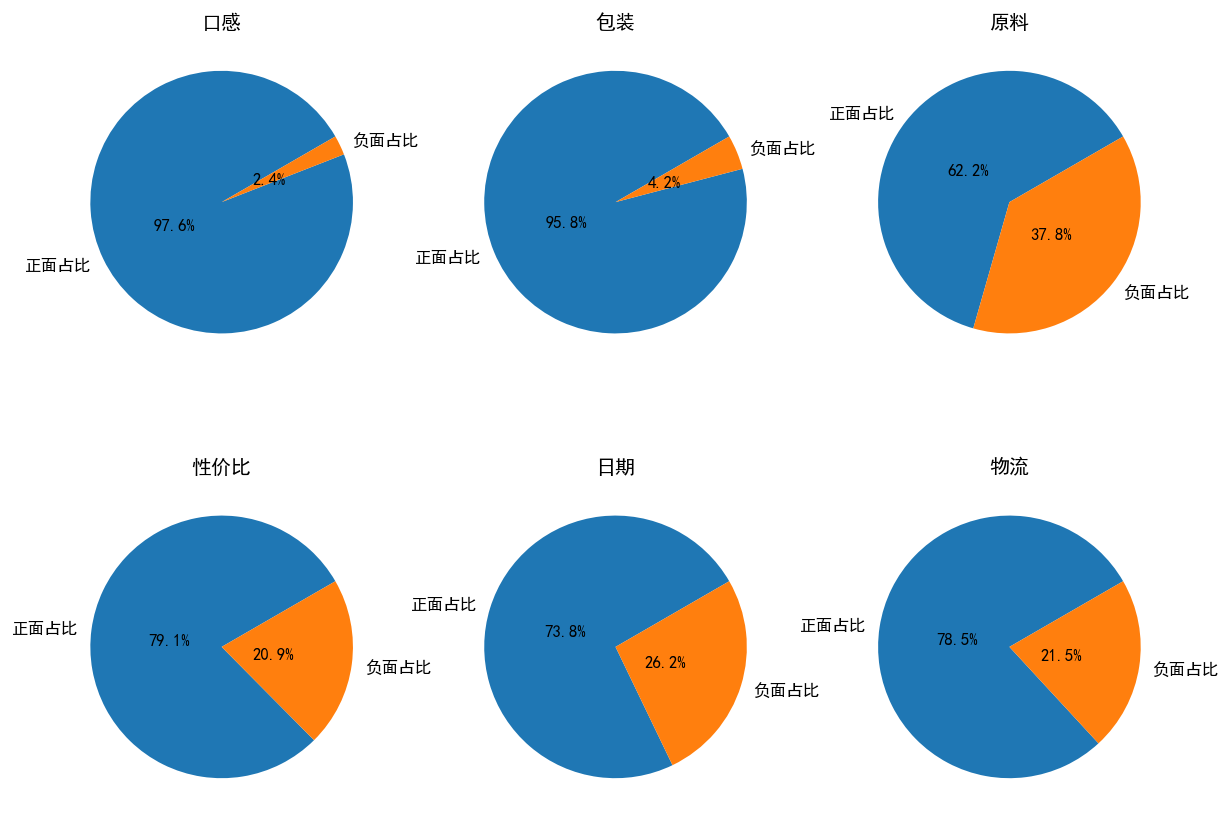

In [128]:
#ÁîªÂá∫ÂêÑÁ±ªÂà´Ê≠£Ë¥üÂç†ÊØîÁöÑÈ•ºÂõæ
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei'

# ÂÆö‰πâÁ±ªÂà´ÂõæÂáΩÊï∞
def category():
    plt.figure(figsize=(12,9), dpi=120)
    j=231
    for i in list3.iterrows():
        x=i[1][[4,7]]     # iÊòØÂ§öÁª¥ÂÖÉÁªÑÁ±ªÂûãÔºå1Ë°®Á§∫Ë°®Ê†ºÔºå4Ë°®Á§∫‰∏ãÊ†áÁ¨¨ÂõõÂàóÔºå7Ë°®Á§∫Á¨¨7Âàó
        labels = ['Ê≠£Èù¢Âç†ÊØî','Ë¥üÈù¢Âç†ÊØî']
        plt.subplot(j)          # ‰∏Ä‰∏™‰ª£Ë°®Ë°åÊï∞ÔºåÁ¨¨‰∫å‰∏™‰ª£Ë°®ÂàóÊï∞ÔºåÁ¨¨‰∏â‰∏™‰ª£Ë°®Á¥¢Âºï‰ΩçÁΩÆ„ÄÇÊÄªÂÖ±‰∏§Ë°åÔºå3ÂàóÔºå‰ΩçÁΩÆ‰ªé1Âà∞6
        plt.pie(x, labels=labels,autopct='%1.1f%%',pctdistance=0.4,startangle=30)
        plt.title(i[1][0])
        j+=1
    
    plt.show()
category()     

In [129]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType

bar1 = Bar(init_opts=opts.InitOpts(width='1000px', height='400px', theme=ThemeType.LIGHT))
bar1.add_xaxis(['Âè£ÊÑü', 'ÂåÖË£Ö', 'ÂéüÊñô', 'ÊÄß‰ª∑ÊØî',  'Êó•Êúü','Áâ©ÊµÅ'])
bar1.add_yaxis("Ê≠£Èù¢ËØÑËÆ∫", [i for i in list3['ÊèêÂèäÊ¨°Êï∞_x']], itemstyle_opts = opts.ItemStyleOpts(color='red'), category_gap="50%")
bar1.add_yaxis("Ë¥üÈù¢ËØÑËÆ∫", [i for i in list3['ÊèêÂèäÊ¨°Êï∞_y']], itemstyle_opts = opts.ItemStyleOpts(color='black'),category_gap="50%")
bar1.set_global_opts(title_opts=opts.TitleOpts(title='ÂÖ≥Ê≥®ÁÇπÁªÜÂàÜÊ≠£Ë¥üÊÉÖÁª™ÂØπÊØî')) 
bar1.set_series_opts(label_opts=opts.LabelOpts(is_show=True))
bar1.render_notebook()

### ËØçÈ¢ëÁªüËÆ°ÈÉ®ÂàÜ

In [130]:

#ËøõË°åÂàÜËØçÔºåÂπ∂‰∏îÁªüËÆ°ÂÖ≥ÈîÆËØçËØçÈ¢ë
import jieba 
import jieba.analyse 

# ËøûÊé•ÊâÄÊúâËØÑËÆ∫ÔºåÁî®Âè•Âè∑ÂÅöÂàÜÈöîÁ¨¶
txt = comments1['content'].str.cat(sep='„ÄÇ')

# Ê∑ªÂä†ÂÖ≥ÈîÆËØçÔºåÈÅáÂà∞‚ÄúÊùéÂ≠êÊüí‚Äù‰∏çÂØπÂÆÉÂàÜËØç
jieba.add_word('ÊùéÂ≠êÊüí')


#ÂÅúÁî®ËØçË°®
stop_words =  ['ÁöÑ','ÊÄé‰πà','ËÄåÂ∑≤','Â∞±','Âíå','Âïä','Âë¢','Âêó','‰∫Ü','Âë¶','Âìü','#','Âï¶','ÂëÄ','Ëøô','ÈÇ£',
               ' ','40', 'hellip', '‰∏ÄË¢ã', '‰∏ÄÂåÖ', '‰∏Ä‰∏™Êúà','Ëû∫‰∏ù','‰∏ÄÁÇπ', 'Âìà',
               '‰∏çËøá','‰ΩÜÊòØ','ÂìàÂìà','‰∏Ä‰∏™','ÈÇ£Áßç',
               '‰∏çÊòØ','Áªà‰∫é','ËøòÊòØ','Êó∂ÂÄô','Ëøô‰∏™','Êó∂ÂÄô','Â∞±ÊòØ',
                   'Ëû∫ÁãÆÁ≤â', 'Ëû∫Ëõ≥','$','Ôºå','„ÄÇ','Ôºü','ÔºÅ','...','Ôºö','Ôºõ', '\n']


#ËøôÈáåÂÖàÊääËØçÈ¢ëÂâç100ÁöÑÁªüËÆ°‰∏Ä‰∏ã
# jieba.lcut() Á≤æÁ°ÆÊ®°ÂºèÂàáÂàÜ‰∏≠Êñá
words = jieba.lcut(txt)
counts={}
for i in words:

    if i in stop_words or len(i) == 1:
        continue
    counts[i] = counts.get(i, 0)+1
items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)



# ËØÑËÆ∫Â≠óÊÆµÊèêÂèñÂÖ≥ÈîÆËØçÔºåÊèêÂèñÂá∫Êù•ÊéíÂêçÂâç100ÁöÑÂÖ≥ÈîÆËØçÔºå‰ª•ÂèäÂÖ≥ÈîÆËØçÁöÑÊùÉÈáçÔºåÔºåÂπ∂‰∏î‰∏çÂØπËØçÊÄßËøáÊª§
#topKÔºö ‰∏∫ËøîÂõûÂá†‰∏™ TF/IDF ÊùÉÈáçÊúÄÂ§ßÁöÑÂÖ≥ÈîÆËØç
word_numbers = jieba.analyse.extract_tags(txt,topK=100,withWeight=True,
                                      allowPOS=())

# ÂéªÂÅúÁî®ËØç
word_numbers_selected = []

for i in word_numbers:
    if i[0] not in stop_words:
        word_numbers_selected.append(i)

key_words = pd.DataFrame(word_numbers_selected, columns=['words','weight'])


#ÂêàÂπ∂‰∏§‰∏™Ë°®Ê†ºÔºåËØçÈ¢ëÊï∞Ë°®ÂíåÊùÉÈáçË°®
weight = pd.DataFrame(word_numbers_selected, columns=['words','weight'])
numbers = pd.DataFrame(items, columns=['words','numbers'])
new_keys = pd.merge(weight,numbers,left_on = 'words' ,right_on = 'words')
new_keys

words    weight  numbers
0     Âë≥ÈÅì  0.279488     2513
1     Â•ΩÂêÉ  0.255029     2077
2     ÂåÖË£Ö  0.155636     1368
3     Âè£ÊÑü  0.136525      946
4    ÊùéÂ≠êÊüí  0.134128      740
..   ...       ...      ...
81    Ê¨¢Ëû∫  0.012144       67
82    Â•Ω‰πÖ  0.012111       94
83    ÊúãÂèã  0.012057      136
84    Âà∞Ë¥ß  0.011940       79
85    ‰πãÂâç  0.011811      150

[86 rows x 3 columns]

In [131]:
# ÁîªËØç‰∫ëÂõæ

from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType 


word1 = WordCloud(init_opts=opts.InitOpts(width='800px', height='600px'))
word1.add("", [*zip(new_keys.words, new_keys.numbers)],  #  Ê†πÊçÆËØçÈ¢ëÊï∞ÊèêÂèñÁöÑËØç‰∫ëÂõæ
          word_size_range=[20, 120],
          shape=SymbolType.DIAMOND)

word1.set_global_opts(title_opts=opts.TitleOpts('ËØÑËÆ∫ÂàÜÂ∏ÉËØç‰∫ëÂõæ'),
#                       toolbox_opts=opts.ToolboxOpts()
                     )
word1.render_notebook()

### Êú∫Âô®Â≠¶‰π†ÁöÑÊñáÊú¨ÂàÜÁ±ªÈÉ®ÂàÜ

In [132]:
#ÂØºÂÖ•Â∑≤ÁªèÊâìÂ•ΩÊ†áÁ≠æÁöÑÊï∞ÊçÆÈõÜÔºåÂπ∂‰∏îÂè™ÂèñÊñáÊú¨ÂíåÊ†áÁ≠æ‰∏§Âàó„ÄÇ
#‰ΩÜÊòØÊï∞ÊçÆÁ±ªÂà´‰∏çÂπ≥Ë°°„ÄÇËøôÈáåÂèØ‰ª•ÈááÂèñÁöÑÂäûÊ≥ïÊúâÊï∞ÊçÆÂ±ÇÈù¢ÁöÑÂäûÊ≥ïÂíåÁÆóÊ≥ïÂ±ÇÈù¢ÁöÑ

'''Á±ªÈó¥‰∏çÂπ≥Ë°°Ôºö‰∏çÂêåÁ±ªÂà´‰πãÈó¥ÁöÑÊï∞ÊçÆÈáèÁõ∏Â∑ÆËæÉÂ§ß
    ÂÜÖÂú®‰∏çÂπ≥Ë°°ÔºöÁî±‰∫éÊï∞ÊçÆÊú¨Ë∫´ÂØºËá¥ÁöÑÊï∞ÊçÆ‰∏çÂπ≥Ë°°ÔºåÂç≥Êï∞ÊçÆÊú¨Ë∫´Â≠òÂú®Ê≠£Ë¥üÊ†∑‰æãÂ∑Æ
    ÁªùÂØπ‰∏çÂπ≥Ë°°ÔºöÁî±‰∫éÊ≠£Ë¥üÊ†∑‰æã‰πãÊØîËæÉÂ§ßÔºå‰æãÂ¶ÇÔºöÊ≠£‰æã10000‰∏™ÔºåË¥ü‰æã100‰∏™ÔºåÊ≠£Ë¥ü‰æã‰πãÊØî‰∏∫100Ôºö1ÔºåËøôÁßçÊÉÖÂÜµÂè´ÂÅöÁõ∏ÂØπ‰∏çÂπ≥Ë°°„ÄÇ
'''

#Êï∞ÊçÆÂ±ÇÈù¢ÁöÑÊúâÊ¨†ÈááÊ†∑ÔºåËøáÈááÊ†∑ÔºåÈöèÊú∫ÈááÊ†∑„ÄÇÁÆóÊ≥ïÂ±ÇÈù¢ÁöÑÊúâ‰ª£‰ª∑ÊïèÊÑüÁÆóÊ≥ï


dateframe = comments1[['content','label']]
# dateframe 
# comments1

#### Êï∞ÊçÆÂ§ÑÁêÜ

In [133]:
# Êü•ÁúãÊï∞ÊçÆÁöÑÁª¥Â∫¶ÂΩ¢Áä∂
print(dateframe.shape)
#Â∞ÜÊï∞ÊçÆÊ†ºÂºèËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Êñπ‰æøÂ§ÑÁêÜ
dateframe['content'] = dateframe['content'].astype('str')

(3940, 2)


In [134]:
patten = r"[!\"#$%&'()*+,-./:;<=>?@[\\\]^_`{|}~‚ÄîÔºÅÔºå„ÄÇÔºü¬∑Ôø•„ÄÅ„Ää„Äã¬∑¬∑¬∑„Äê„ÄëÔºö" "''\s0-9\U0001f60a\U00010000-\U0010ffff\uD800-\uDBFF\uDC00-\uDFFF]+"  # Ê†áÁÇπÁ¨¶Âè∑ÂíåÊï∞Â≠ó,Ë°®ÊÉÖ
re_obj = re.compile(patten)
def clear(text):
    return re_obj.sub('', text)  #ÂéªÈô§Ê†áÁÇπÁ¨¶Âè∑ÂíåÊï∞Â≠óÔºåË°®ÊÉÖ


dateframe['content'] = dateframe['content'].apply(clear)    #ÂáΩÊï∞Âàô‰ºöÈÅçÂéÜÊØè‰∏Ä‰∏™ÂÖÉÁ¥†ÔºåÂØπÂÖÉÁ¥†ËøêË°åclear()
# dateframe.head(10)

In [135]:
def cut_words(words):
    return jieba.lcut(words)  # ‰ΩøÁî®lcutÂàÜËØç

dateframe['content'] = dateframe['content'].apply(cut_words)  #applyÂáΩÊï∞ÂØπseriesÁöÑÊØè‰∏ÄË°åÊï∞ÊçÆËøõË°åcut_words()Â§ÑÁêÜ
# dateframe

In [136]:
# ÂÅúÁî®ËØçÂ§ÑÁêÜÁõ¥Êé•Áî®ÂâçÈù¢ÊÉÖÊÑüÂàÜÊûêÁöÑÂÅúÁî®ËØçË°®
def remove_stop(words):  #ÁßªÈô§ÂÅúÁî®ËØçÂáΩÊï∞
    texts = []

    for word in words:  # ÈÅçÂéÜÂàóË°®ÈáåÁöÑÊØè‰∏™ËØç
        if word not in stop_words :  # Ëã•‰∏çÂú®ÂÅúÁî®ËØçÂàóË°®‰∏≠Â∞±Â∞ÜÁªìÊûúËøΩÂä†Ëá≥textsÂàóË°®‰∏≠
            texts.append(word)

    return texts


dateframe['content'] = dateframe['content'].apply(remove_stop)
# dateframe.head(10)

In [137]:
def list_str(content):
    return ' '.join(content)  #Â∞ÜÂàóË°®ÂÖÉÁ¥†ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤

dateframe['content'] = dateframe['content'].apply(list_str)
dateframe.head(10)

content  label
0  Êï¥‰Ωì ËØÑ‰ª∑ Ëøò ‰∏çÈîô ‰∏úË•ø ËõÆ Â•Ω Á¨¨‰∏ÄÊ¨° ‰π∞ ÊùéÂ≠êÊüí ÂÆ∂ ‰∏úË•ø ‰∏çÈîôÂëÄ Ê£íÊ£í Âìí ËÉÄ ÂåÖ ...      1
1  ÔºÉ ÊüíÂÆ∂Áæé Êãç Ëææ ‰∫∫ ÔºÉ ÂΩì ÂêÉ Âà∞ ÊùéÂ≠êÊüí ÂÆ∂ Á¨¨‰∏ÄÂè£ Âè™ÊÉ≥ ËØ¥ Êº´Èïø Á≠âÂæÖ ÊòØ ÂÄºÂæó ...      1
2  Êï¥‰Ωì ËØÑ‰ª∑ ‰∏çÈîô ËÉÄ ÂåÖ ÈóÆÈ¢ò Êó† ÂåÖË£Ö ÂìÅË¥® Â•Ω Âè£ÊÑü Âë≥ÈÅì Ëæ£Ê§í ÂçäÂåÖ Â∞±Â§ü Êå∫ È¶ô Êñ∞...      1
3  ÊüíÂÆ∂Áæé Êãç Ëææ ‰∫∫ Á≠âÂæÖ Â•Ω‰πÖ ÁæéÈ£ü Âà∞ ÂèØ‰ª• ËØ¥ ÊúüÂæÖ Âæà ‰πÖ ÊãøÂà∞ Âêé ÊøÄÂä® Âæà ‰πÖ ÊÉ≥...      1
4  Êúà Âè∑ ‰∏ãÂçï Êúà Âè∑ Êî∂Âà∞ ÂìàÂìàÂìàÂìà ‰∏çÊÑß ÊòØ Êàë Á≠â Á≤â Â•ΩÂêÉ Âà∞ ÁàÜÁÇ∏ ÈªÑÂÖàÁîü ‰ªéÊù•‰∏ç ...      1
5  ÊçÆËØ¥ Á≤â Ëá≠Âë≥ ÊòØ Âõ†ÈÖ∏Á¨ã ËÄå Á≤â Ê±§ Áî± ËÇâ È™®Â§¥ ÁÜ¨Êàê Ê≠§‰∏æ ‰Ωø Ê±§ Ê∏ÖÁîú ‰∏é È≤úÁæé Âêé...      1
6  Êï¥‰Ωì ËØÑ‰ª∑ ÊùêÊñô ÂæàË∂≥ËÉÄ ÂåÖ ÈóÆÈ¢ò Ê≤° ÂèëÁé∞ ËÉÄ ÂåÖ ÈóÆÈ¢ò ÂåÖË£Ö ÂìÅË¥® ÂåÖË£Ö ‰∏•ÂØÜ Âè£ÊÑü Âë≥...      1
7  Â§™ Â•ΩÂêÉ ÁªùÂØπ ÊòØ Êàë ÂêÉ Ëøá ÊúÄ Â•ΩÂêÉ Â§çË¥≠ Â•Ω Â§öÊ¨° ÈÖ∏Á¨ã Êú®ËÄ≥ ÈÖ∏Ë±ÜËßí ËÖêÁ´π Ëä±Áîü Êñô...      1
8  Âú® ÂçóÂÆÅ Êü≥Â∑û ÂêÉ Ëøá Á≤â Ê∑±Ê∑± Áà± ‰∏ä ÁÑ∂Âêé ‰∏ÄÂ§© Êó†ÊÑè ‰∏≠ Âú® Ê∑òÂÆù ÁúãÂà∞ ÊùéÂ≠êÊüí ÂÆ∂ ...      1
9  Á≠â ‰∏Ä‰∏™Â§öÊúà Âà∞Ë¥ß Ê≤°ÁôΩ Á≠â Ëøô‰πà ÈïøÊó∂Èó¥ Âë≥ÈÅì Ë∂ÖÁ∫ß ËµûÂêÉ ÈÇ£‰πà Â§ö Á≤â ÊùéÂ≠êÊüí ÂÆ∂ ÊúÄ ...      1

1    2872
0    1068
Name: label, dtype: int64


<AxesSubplot:>

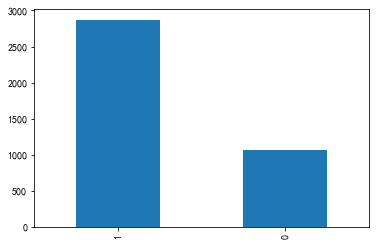

In [138]:
# ÁªüËÆ°Êï∞ÊçÆÁöÑÊ†áÁ≠æÔºåÂπ∂‰∏îÁîªÂá∫Êü±Áä∂Âõæ
print(dateframe['label'].value_counts())
dateframe['label'].value_counts().plot(kind='bar')

‰ªé‰∏äÈù¢ÁöÑÊï∞ÊçÆÂØπÊØîÂèØ‰ª•ÁúãÂá∫ÔºåÊ†∑Êú¨Â≠òÂú®‰∏•ÈáçÁöÑ‰∏çÂùáË°°ÈóÆÈ¢òÔºåËøôÈáåËÄÉËôë‰∏§ÁßçÊ†∑Êú¨ÂùáË°°ÁöÑÁ≠ñÁï•Ôºö

Ê¨†ÈááÊ†∑ÔºöÊ≠£Ë¥üÊ†∑Êú¨ÂêÑ1000Êù°Ôºå‰∏ÄÂÖ±2000Êù°

ËøáÈááÊ†∑ÔºöÊ≠£Ë¥üÊ†∑Êú¨ÂêÑ1500Êù°Ôºå‰∏ÄÂÖ±3000Êù°


#### Êï∞ÊçÆÂùáË°°

In [139]:
#ËøõË°åËøáÈááÊ†∑ÂíåÊ¨†ÈááÊ†∑Â§ÑÁêÜÔºåÁîüÊàêÊñ∞Êï∞ÊçÆ
def get_balanced_words(size,
                       positive_comment=dateframe[dateframe['label'] == 1],  # Ê≠£Èù¢ËØÑËÆ∫ÔºåÊ†áÁ≠æ‰∏∫1
                       negtive_comment=dateframe[dateframe['label'] == 0]):  # Ë¥üÈù¢ËØÑËÆ∫ÔºåÊ†áÁ≠æ‰∏∫0
    
    word_size = size // 2
    
    num_pos = positive_comment.shape[0]       #Ëé∑ÂèñÂéüÊú¨ÊóßÁöÑÊï∞ÊçÆÈõÜ‰∏≠ÁöÑ Ê≠£ ËØÑËÆ∫Êï∞
    num_neg = negtive_comment.shape[0]       #Ëé∑Âèñ Ë¥ü ËØÑËÆ∫Êï∞
    
    #     ÂΩì Ê≠£(Ë¥ü)ËØÑËÆ∫Êï∞‰∏≠<ÈááÊ†∑Êï∞Èáè/2 Êó∂ÔºåËøõË°åÊúâÊîæÂõûÈááÊ†∑ÔºåÂê¶ÂàôÈÉΩÊòØÊó†ÊîæÂõûÈááÊ†∑Ôºõ
    #     ÂÖ∂‰∏≠pandasÁöÑsampleÊñπÊ≥ïÈáåÁöÑrepalceÂèÇÊï∞‰ª£Ë°®ÊòØÂê¶ËøõË°åÊúâÊîæÂõûÈááÊ†∑ÔºåÈªòËÆ§ÂàôËøõË°åÊó†ÊîæÂõûÊäΩÊ†∑
    
    # pd.concat Áî®‰∫éËøûÊé•Ê≠£Èù¢ÁöÑËØÑËÆ∫ÂíåË¥üÈù¢ÁöÑËØÑËÆ∫Ôºå‰∏ä‰∏ãËøûÊé•ËÄå‰∏çÊòØÂ∑¶Âè≥ËøûÊé•
    balanced_words = pd.concat([
         #Ê≠£Ê†∑Êú¨2872ÔºåË¥üÊ†∑Êú¨1068„ÄÇÊâÄ‰ª•Ê≠£Ê†∑Êú¨ÊÄªÊòØÊó†ÊîæÂõûÊäΩÊ†∑
        positive_comment.sample(word_size,                       
                                replace=num_pos < word_size,      # replaceÊé•Êî∂‰∏Ä‰∏™boolÁ±ªÂûãÊï∞ÊçÆ  ,ÂΩì‰∏∫Ë°®ËææÂºèÁöÑÁªìÊûú‰∏∫ÁúüÊó∂ÔºåÂàôÊúâÊîæÂõûÊäΩÊ†∑„ÄÇ
                                random_state=0),                 # random_stateË°®Á§∫Âú®Âêå‰∏Ä‰∏™Êï∞ÊçÆÈõÜ‰∏äÔºåÂâçÂêéÊäΩÊ†∑ÂæóÂà∞‰∏çÂêåÊ†∑ÁöÑÁªìÊûú
        negtive_comment.sample(word_size,
                               replace=num_neg < word_size,       # Ë¥üÊ†∑Êú¨1068‰∏™Ôºåsize=3000Êó∂ÔºåÂàôÊúâÊîæÂõûÊäΩÊ†∑„ÄÇ
                               random_state=0)                    # ÂΩìÊ¨†ÈááÊ†∑Êó∂ÔºàÊÄªÂÖ±2000Êù°Êï∞ÊçÆÔºâÔºå‰∏çÊª°Ë∂≥Ëøô‰∏™replaceÊù°‰ª∂Ôºå‰∏çÊîæÂõûÊäΩÊ†∑„ÄÇ
    ])                                                            ##  ÂΩì‚Äúreplace=False‚ÄùÊó∂ÔºåÊó†Ê≥ïËé∑ÂèñÊØîÊÄª‰ΩìÊõ¥Â§ßÁöÑÊ†∑Êú¨!
    #     ÊâìÂç∞Ê†∑Êú¨‰∏™Êï∞
    print('Ê†∑Êú¨ÊÄªÊï∞Ôºö', balanced_words.shape[0])
    print('Ê≠£Ê†∑Êú¨Êï∞Ôºö', balanced_words[dateframe['label'] == 1].shape[0])
    print('Ë¥üÊ†∑Êú¨Êï∞Ôºö', balanced_words[dateframe['label'] == 0].shape[0])
    print('')
    return balanced_words

In [140]:
data_2000 = get_balanced_words(2000)
data_3000 = get_balanced_words(3000)


Ê†∑Êú¨ÊÄªÊï∞Ôºö 2000
Ê≠£Ê†∑Êú¨Êï∞Ôºö 1000
Ë¥üÊ†∑Êú¨Êï∞Ôºö 1000

Ê†∑Êú¨ÊÄªÊï∞Ôºö 3000
Ê≠£Ê†∑Êú¨Êï∞Ôºö 1500
Ë¥üÊ†∑Êú¨Êï∞Ôºö 1500



In [141]:
#Êü•Áúã5Êù°Êï∞ÊçÆ
data_2000.head(5)

content  label
1157  Á≠â ÈÇ£‰πà ‰πÖÂàö ÊãøÂà∞ Êâã Ëø´‰∏çÂèäÂæÖ ÁÖÆ Êù• ÂêÉ ÁÖÆÊ≥ï Âæà ÁÆÄÂçï ÁÑ∂Âêé Áà± ‰∏ä ÂìàÂìàÂìà ÂêÉ ÂÆå...      1
399   Êï¥‰Ωì ËØÑ‰ª∑ ÂåÖË£Ö Âæà Â•ΩÁúã ÊØîËæÉ Âπ≤ÂáÄ Âè£Âë≥ ÊØîËæÉ Âí∏ ÂÜ≤ÁùÄ ÈÄÅ Èº†Ê†áÂû´ ‰ªΩ ‰∏ä Áªô Â•ΩËØÑ ...      1
2142  ‰π∞ Â•Ω Â§öÊ¨° ÁúüÁöÑ Âæà ÂñúÊ¨¢ Âë≥ÈÅì Ê≠£ÂÆó ÂÅö Ê¥ªÂä® ‰π∞ Âæà ÂàíÁÆó ÂêÉ ÂÆå ÂÜç Ë¥≠‰π∞ ÊÄª‰πã Âñú...      1
670   Êï¥‰Ωì ËØÑ‰ª∑ Ëµû Âì¶ ËÉÄ ÂåÖ ÈóÆÈ¢ò ‰πü Ê≤°Êúâ Âá∫Áé∞ ËÉÄ ÂåÖ ÊÉÖÂÜµ ÂåÖË£Ö ÂìÅË¥® Êï¥‰∏™ ÂåÖË£Ö ‰πü ...      1
138   Êï¥‰Ωì ËØÑ‰ª∑ ÂæàÂ§ß Êª°Êª°ÁöÑ ÊñôÁ≤â Â•≥Áîü ÂèØ‰ª• Â§üÂêÉ Áî∑Áîü ÂèØËÉΩ ‰∏çË°å Á≠â Á≤â Âà∞Êâã ‰ª∑Ê†º Ë¥µ ...      1

In [142]:
#Êü•Áúã5Êù°Êï∞ÊçÆ
data_3000.sample(5)

content  label
3574                         ÂÆûÁâ© ‰∏ÄËá¥ Â•ΩÊ£í Áâ©ÊµÅ Ë∂ÖÂø´      0
3749                      Èöæ‰ª•ÂøòÊÄÄ Âë≥ÈÅì ÂÆ∂Èáå‰∫∫ ÈÉΩ Áà± ÂêÉ      0
2782  Âø´ÈÄí ÈÄüÂ∫¶ Ë∂ÖÁªôÂäõ ÈáçÁÇπ ÊòØ Â•ΩÂêÉ Âë≥ÈÅì ÁúüÁöÑ ‰∏çÈîô ÂêÉ ÂÆå ÂÜç Êù• Ë°•Ë¥ß      1
3532                                Â•ΩÂêÉ ÂñúÊ¨¢ ÂêÉ      0
1519                 Âè£ÊÑü Âë≥ÈÅì ÂàÜ Êï¥‰Ωì ËØÑ‰ª∑ Â•Ω Êñ∞È≤úÂ∫¶ ‰∏çÈîô      1

#### ÂØπ2000ÁöÑÊï∞ÊçÆÈõÜËøõË°åËÆ≠ÁªÉÂª∫Ê®°

In [143]:
from sklearn.model_selection import train_test_split
#ÂàáÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÔºåÁî®75%ÂÅöËÆ≠ÁªÉÈõÜ„ÄÅ25%ÂÅöÊµãËØïÈõÜÔºå‰∫åËÄÖÈááÁî®Áõ∏ÂêåÁöÑÂàáÂàÜÁ≠ñÁï•

x_train, x_test, y_train, y_test = train_test_split(data_2000['content'],     # ÈªòËÆ§ÁöÑtest_size‰∏∫25%
                                                    data_2000['label'],
                                                    random_state=1,    #Âõ∫ÂÆöÈöèÊú∫ÁßçÂ≠êÔºåÊØèÊ¨°ËøêË°åÂàÜÁöÑËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÈÉΩÂÆåÂÖ®‰∏ÄÊ†∑
                                                    shuffle=True)

In [144]:
#Âú®Ê≠£ÂºèÂª∫Ê®°‰πãÂâçÔºåÂÖàÂ∞ÜËØçËΩ¨Êç¢ÊàêÂêëÈáèÔºåÂç≥ÊâÄË∞ìÁöÑËØçÂµåÂÖ•„ÄÇËøôÈáå‰∏ªË¶ÅÈááÁî®tf-idfÊñπÊ°à:
#‰∏ªË¶ÅÊòØÔºåtf-idfÂØπÊØè‰∏™ËØçËøõË°åÂ§ÑÁêÜÂæóÂà∞ÁöÑÊòØ‰∏Ä‰∏™Ê¶ÇÁéáÂêëÈáèÔºåËÄåword2vecÂæóÂà∞ÁöÑÊòØÊ¶ÇÁéáÁü©ÈòµÔºå‰∫åËÄÖÂØπÂêéÁª≠ÁöÑÂ§ÑÁêÜÊïàÁéáÂ∑ÆÂºÇËøáÂ§ß


from sklearn.feature_extraction.text import TfidfVectorizer  #ÂéüÂßãÊñáÊú¨ËΩ¨Âåñ‰∏∫tf-idfÁöÑÁâπÂæÅÁü©Èòµ

tf_idf = TfidfVectorizer()

x_trian_vec = tf_idf.fit_transform(x_train)  #Â∞ÜËÆ≠ÁªÉÈõÜÊñáÊú¨ËΩ¨Êç¢‰∏∫ÂêëÈáè

x_test_vec = tf_idf.transform(x_test)  #Â∞ÜÊµãËØïÈõÜÊñáÊú¨ËΩ¨Êç¢‰∏∫ÂêëÈáè

x_trian_vec.shape  #Êü•ÁúãÂΩ¢Áä∂

(1500, 3288)

ËØçÂêëÈáèÂ§ÑÁêÜÂêéÁöÑÁâπÂæÅÁª¥Â∫¶ËøáÂ§öÔºåÂØºËá¥ËÆ°ÁÆóÈáèÂ∑®Â§ßÔºåËÄå‰∏î‰∏Ä‰∫õtf-idfÊØîËæÉ‰ΩéÁöÑÁâπÂæÅÊú¨Ë∫´‰ºöÂØπÊ®°Âûã‰∫ßÁîüÂΩ±ÂìçÔºõ‰∏∫‰∫ÜÊ∂àÈô§Ëøô‰∫õË¥üÈù¢ÂΩ±ÂìçÔºåÈúÄË¶ÅÂØπÁâπÂæÅËøõË°åÁ≤æÁÆÄÔºåÂéªÊéâ‰∏Ä‰∫õÁâπÂæÅ„ÄÇ

In [145]:
#ÊèêÂâçÂØºÂÖ•ÁâπÂæÅÈÄâÊã©ÂíåÂª∫Ê®°ÈúÄË¶ÅÁöÑÂ∫ì
from sklearn.feature_selection import f_classif
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [146]:
#ÊñπÂ∑ÆÂàÜÊûêÈÄöËøáÊûÑÂª∫f ÁªüËÆ°ÈáèÔºàÁªÑÂÜÖÂ∑ÆÂºÇÂùáÂÄº/ÁªÑÈó¥Â∑ÆÂºÇÂùáÂÄºÔºâÔºåÊù•ÈÄâÊã©‰∏éÁõÆÊ†áÂàÜÁ±ªÂèòÈáèÊúÄÁõ∏ÂÖ≥ÁöÑk‰∏™ÂèòÈáè„ÄÇ
# ÂÖàÂ∞ÜËØçÂêëÈáèËøõË°åËΩ¨Êç¢floatÁ±ªÂûã„ÄÇÂêéÈù¢ÈÄÅÂÖ•‰ª•f ÁªüËÆ°Èáè‰Ωú‰∏∫ÈÄâÊã©Ê†áÂáÜÁöÑÁâπÂæÅÈÄâÊã©Âô®‰∏≠
x_trian_vec = x_trian_vec.astype(np.float64)  #ËΩ¨Êç¢‰∏∫numpyÁöÑfloatÁ±ªÂûãÔºå‰æø‰∫ésklearnÂ§ÑÁêÜ
x_test_vec = x_test_vec.astype(np.float64)

In [147]:
#ÁâπÂæÅÁª¥Â∫¶Â§™È´òÔºåÂ§ÑÁêÜËµ∑Êù•ËÆ°ÁÆóÊó∂Èó¥ÈïøÔºåÊâÄ‰ª•ÈÄâÊã©ÈôçÁª¥Â§ÑÁêÜ„ÄÇSelectKBestËÉΩ‰øùÂ≠òÂéüÊù•ÁâπÂæÅÁöÑÁª¥Â∫¶‰∏ãÈôç
#f_calssifÊñπÊ≥ïÊòØÁî®Êù•ËÆ°ÁÆó‰∏§‰∏™ÁâπÂæÅ‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß
selector = SelectKBest(f_classif, k=min(400, x_trian_vec.shape[1]))  #ÈÄâÊã©Âô®„ÄÇf_classifÔºöÊ†∑Êú¨ÊñπÂ∑ÆFÂÄº„ÄÇkÔºöËÆ°ÁÆóÂâçk‰ΩçÂæóÂàÜÊúÄÈ´òÁöÑÁâπÂæÅ

selector.fit(x_trian_vec, y_train)  #ËÆ≠ÁªÉ„ÄÇËøêË°åËÆ∞ÂàÜÂáΩÊï∞Âπ∂ÂæóÂà∞ÈÄÇÂΩìÁöÑÁâπÂæÅ

selected_x_trian = selector.transform(x_trian_vec)  # ËΩ¨Êç¢x_train ÔºåÂ∞Ü x_train ËøòÂéü‰∏∫ÊâÄÈÄâÁâπÂæÅ 

selected_x_test = selector.transform(x_test_vec) # ËΩ¨Êç¢x_test

print('selected_x_trian.shape  ',selected_x_trian.shape)
print('selected_x_test.shape   ',selected_x_test.shape)

selected_x_trian.shape   (1500, 400)
selected_x_test.shape    (500, 400)


In [148]:
#ÈÄªËæëÂõûÂΩí

from sklearn.linear_model import LogisticRegression  #ÂØºÂÖ•ÈÄªËæëÂõûÂΩíÊ®°Âûã
lr = LogisticRegression()

lr.fit(selected_x_trian, y_train)

y_lr = lr.predict(selected_x_test)

#ÊâìÂç∞ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑf1ÂÄº„ÄÅrecallÁ≠â
print('lrÊµãËØïÈõÜÔºö', classification_report(y_test, y_lr))
print('lrÊµãËØïÈõÜaucÔºö', roc_auc_score(y_test, y_lr))

print()

print('lrËÆ≠ÁªÉÈõÜÔºö', classification_report(y_train, lr.predict(selected_x_trian)))
print('lrËÆ≠ÁªÉÈõÜaucÔºö', roc_auc_score(y_train, lr.predict(selected_x_trian)))

lrÊµãËØïÈõÜÔºö               precision    recall  f1-score   support

           0       0.70      0.78      0.74       245
           1       0.76      0.69      0.72       255

    accuracy                           0.73       500
   macro avg       0.73      0.73      0.73       500
weighted avg       0.73      0.73      0.73       500

lrÊµãËØïÈõÜaucÔºö 0.730892356942777

lrËÆ≠ÁªÉÈõÜÔºö               precision    recall  f1-score   support

           0       0.78      0.87      0.82       755
           1       0.85      0.75      0.80       745

    accuracy                           0.81      1500
   macro avg       0.82      0.81      0.81      1500
weighted avg       0.82      0.81      0.81      1500

lrËÆ≠ÁªÉÈõÜaucÔºö 0.8109471532068093


In [149]:
#xgb

from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=55, max_depth=4) # ‰∏∫Èò≤Ê≠¢ËøáÊãüÂêàÔºåÈááÁî®ËæÉ‰∏∫Â∞ëÁöÑÊ†ëÔºå‰ª•ÂèäÂÜ≥Á≠ñÊ†ëÊ∑±Â∫¶„ÄÇÂü∫Â≠¶‰π†Âô®ÁöÑ‰∏™Êï∞‰∏∫55ÔºåÊ†ëÁöÑÊ∑±Â∫¶‰∏∫4

xgb.fit(selected_x_trian, y_train)

y_xgb = xgb.predict(selected_x_test)

print('xgboostÊµãËØïÈõÜÔºö', classification_report(y_test, y_xgb))
print('xgboostÊµãËØïÈõÜaucÔºö', roc_auc_score(y_test, y_xgb))

print()

print('xgboostËÆ≠ÁªÉÈõÜÔºö', classification_report(y_train, xgb.predict(selected_x_trian)))
print('xgboostËÆ≠ÁªÉÈõÜaucÔºö', roc_auc_score(y_train, xgb.predict(selected_x_trian)))

[14:51:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboostÊµãËØïÈõÜÔºö               precision    recall  f1-score   support

           0       0.70      0.88      0.78       245
           1       0.85      0.63      0.72       255

    accuracy                           0.75       500
   macro avg       0.77      0.76      0.75       500
weighted avg       0.77      0.75      0.75       500

xgboostÊµãËØïÈõÜaucÔºö 0.7565026010404161

xgboostËÆ≠ÁªÉÈõÜÔºö               precision    recall  f1-score   support

           0       0.83      0.96      0.89       755
           1       0.95      0.79      0.87       745

    accuracy                           0.88      1500
   macro avg       0.89      0.88      0.88      1500
weighted

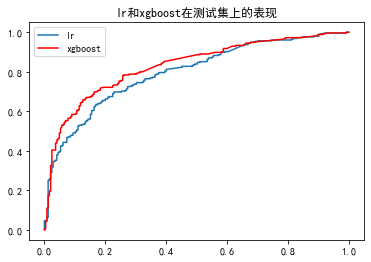

In [150]:
#ÁªòÂà∂rocÊõ≤Á∫ø
from pylab import mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei'] # ÊåáÂÆöÈªòËÆ§Â≠ó‰Ωì

fpr, tpr, thresholds = roc_curve(y_test,
                                 lr.predict_proba(selected_x_test)[:, 1],
                                 pos_label=1)
fpr_1, tpr_1, thresholds = roc_curve(y_test,
                                 xgb.predict_proba(selected_x_test)[:, 1],
                                 pos_label=1)   
plt.plot(fpr, tpr,label='lr')
plt.plot(fpr_1, tpr_1,color='red',label='xgboost')

plt.legend()
plt.title('lrÂíåxgboostÂú®ÊµãËØïÈõÜ‰∏äÁöÑË°®Áé∞')
plt.show()

#### ÂØπ3000ÁöÑÊï∞ÊçÆÈõÜËøõË°åËÆ≠ÁªÉ

In [151]:
# 3000ÁöÑÊï∞ÊçÆÈõÜËøõË°åÂª∫Ê®°
# Êï∞ÊçÆÂàáÂàÜ

x_train, x_test, y_train, y_test = train_test_split(data_3000['content'],
                                                    data_3000['label'],
                                                    random_state=1,
                                                    shuffle=True)

# ËØçÂêëÈáèÂåñ
tf_idf = TfidfVectorizer()
x_trian_vec = tf_idf.fit_transform(x_train)

x_test_vec = tf_idf.transform(x_test)

x_trian_vec = x_trian_vec.astype(np.float64)

x_test_vec = x_test_vec.astype(np.float64)

# ÁâπÂæÅÈÄâÊã©
selector = SelectKBest(f_classif, k=min(400, x_trian_vec.shape[1]))

selector.fit(x_trian_vec, y_train)

selected_x_trian = selector.transform(x_trian_vec)      #Â∞Ü x_trian_vec ËøòÂéü‰∏∫ÊâÄÈÄâÁâπÂæÅ

selected_x_test = selector.transform(x_test_vec)


#lrÊ®°Âûã

lr.fit(selected_x_trian, y_train)

y_hat = lr.predict(selected_x_test)

print('lrÊµãËØïÈõÜÔºö',classification_report(y_test, y_hat))
print('lrÊµãËØïÈõÜaucÔºö', roc_auc_score(y_test, y_hat))
print()

print('lrËÆ≠ÁªÉÈõÜÔºö',classification_report(y_train, lr.predict(selected_x_trian)))
print('lrËÆ≠ÁªÉÈõÜaucÔºö', roc_auc_score(y_train, lr.predict(selected_x_trian)))

lrÊµãËØïÈõÜÔºö               precision    recall  f1-score   support

           0       0.77      0.80      0.79       379
           1       0.79      0.76      0.77       371

    accuracy                           0.78       750
   macro avg       0.78      0.78      0.78       750
weighted avg       0.78      0.78      0.78       750

lrÊµãËØïÈõÜaucÔºö 0.7811093173267715

lrËÆ≠ÁªÉÈõÜÔºö               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1121
           1       0.82      0.79      0.80      1129

    accuracy                           0.81      2250
   macro avg       0.81      0.81      0.81      2250
weighted avg       0.81      0.81      0.81      2250

lrËÆ≠ÁªÉÈõÜaucÔºö 0.8076242346569911


In [152]:
#xgbÊ®°Âûã
xgb.fit(selected_x_trian, y_train)
y_hat=xgb.predict(selected_x_test)  

print('xgboostÊµãËØïÈõÜÔºö',classification_report(y_test, y_hat))
print('xgboostÊµãËØïÈõÜaucÔºö', roc_auc_score(y_test, y_hat))
print()

print('xgboostËÆ≠ÁªÉÈõÜÔºö',classification_report(y_train, xgb.predict(selected_x_trian)))
print('xgboostËÆ≠ÁªÉÈõÜaucÔºö', roc_auc_score(y_train, xgb.predict(selected_x_trian)))

[14:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboostÊµãËØïÈõÜÔºö               precision    recall  f1-score   support

           0       0.77      0.91      0.83       379
           1       0.88      0.73      0.80       371

    accuracy                           0.82       750
   macro avg       0.83      0.82      0.82       750
weighted avg       0.83      0.82      0.82       750

xgboostÊµãËØïÈõÜaucÔºö 0.8163595502421609

xgboostËÆ≠ÁªÉÈõÜÔºö               precision    recall  f1-score   support

           0       0.83      0.94      0.88      1121
           1       0.94      0.80      0.86      1129

    accuracy                           0.87      2250
   macro avg       0.88      0.87      0.87      2250
weighted

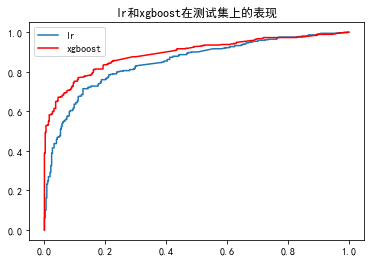

In [153]:
from pylab import mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei'] # ÊåáÂÆöÈªòËÆ§Â≠ó‰Ωì

fpr, tpr, thresholds = roc_curve(y_test,
                                 lr.predict_proba(selected_x_test)[:, 1],
                                 pos_label=1)
fpr_1, tpr_1, thresholds = roc_curve(y_test,
                                 xgb.predict_proba(selected_x_test)[:, 1],
                                 pos_label=1)   
plt.plot(fpr, tpr,label='lr')
plt.plot(fpr_1, tpr_1,color='red',label='xgboost')

plt.legend()
plt.title('lrÂíåxgboostÂú®ÊµãËØïÈõÜ‰∏äÁöÑË°®Áé∞')
plt.show()

In [154]:
#xgb+lrÊ®°Âûã

xgb.fit(selected_x_trian, y_train)

[14:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=55, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [155]:
xgb.apply(selected_x_trian).shape # applyÊñπÊ≥ïÂ∞ÜÊ®°ÂûãÂ∫îÁî®‰∫éÊï∞ÊçÆÔºåËøîÂõûÂè∂Á¥¢Âºï

(2250, 55)

In [156]:
xgb.apply(selected_x_test).shape

(750, 55)

In [157]:
# ‰∏ÄÊ¨°Â∞ÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁâπÂæÅÁªÑÂêàÁªìÊûúËΩ¨Êç¢‰∏∫one_hotÁºñÁ†Å
all_leaf = np.concatenate(
    (xgb.apply(selected_x_trian), xgb.apply(selected_x_test)), axis=0) 
enc_leaf = OneHotEncoder()
enc_leaf.fit(all_leaf)
all_leaf = enc_leaf.transform(all_leaf)
all_leaf.shape

(3000, 439)

In [158]:

x_train_all = np.hstack((all_leaf[:2250, :].toarray(),
                         selected_x_trian.astype(np.float64).toarray()))
lr.fit(x_train_all, y_train)

print('ËÆ≠ÁªÉÈõÜÔºö',classification_report(y_train, lr.predict(x_train_all)))

print()

x_test_all = np.hstack((all_leaf[2250:, :].toarray(),
                        selected_x_test.astype(np.float64).toarray()))

print('ÊµãËØïÈõÜÔºö',classification_report(y_test, lr.predict(x_test_all)))

ËÆ≠ÁªÉÈõÜÔºö               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1121
           1       0.97      0.85      0.91      1129

    accuracy                           0.91      2250
   macro avg       0.92      0.91      0.91      2250
weighted avg       0.92      0.91      0.91      2250


ÊµãËØïÈõÜÔºö               precision    recall  f1-score   support

           0       0.78      0.91      0.84       379
           1       0.88      0.75      0.81       371

    accuracy                           0.83       750
   macro avg       0.83      0.83      0.83       750
weighted avg       0.83      0.83      0.83       750



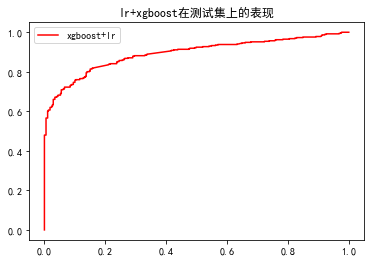

In [159]:
from pylab import mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei'] # ÊåáÂÆöÈªòËÆ§Â≠ó‰Ωì


# fpr, tpr, thresholds = roc_curve(y_test,
#                                  lr.predict_proba(x_test_all)[:, 1],
#                                  pos_label=1)
fpr_1, tpr_1, thresholds = roc_curve(y_test,
                                 lr.predict_proba(x_test_all)[:, 1],
                                 pos_label=1)  

# plt.plot(fpr, tpr,label='lr')
plt.plot(fpr_1, tpr_1,color='red',label='xgboost+lr')

plt.legend()
plt.title('lr+xgboostÂú®ÊµãËØïÈõÜ‰∏äÁöÑË°®Áé∞')
plt.show()

#### Áî®ÂéüÊù•Ê≠£Ë¥üÊ†∑Êú¨‰∏çÂπ≥Ë°°ÁöÑÊï∞ÊçÆÈõÜÂÅöÂØπÊØî
ÊúÄÂêéÂÜçÊù•‰∏Ä‰∏™XGBÊù•ÂØπÊØî„ÄÇÁî®ÁöÑÊúÄÂºÄÂßãÁöÑÊâìÂ•ΩÊ†áÁ≠æÊï∞ÊçÆÈõÜÔºåÊ≤°ÊúâÁªèËøáÈááÊ†∑ÁöÑÊï∞ÊçÆ„ÄÇ

In [160]:
# 3940ÁöÑÊï∞ÊçÆÈõÜËøõË°åÂª∫Ê®°
# Êï∞ÊçÆÂàáÂàÜ

x_train, x_test, y_train, y_test = train_test_split(dateframe['content'],
                                                    dateframe['label'],
                                                    random_state=1,
                                                    shuffle=True)

# ËØçÂêëÈáèÂåñ
tf_idf = TfidfVectorizer()
x_trian_vec = tf_idf.fit_transform(x_train)

x_test_vec = tf_idf.transform(x_test)

x_trian_vec = x_trian_vec.astype(np.float64)

x_test_vec = x_test_vec.astype(np.float64)

# ÁâπÂæÅÈÄâÊã©
selector = SelectKBest(f_classif, k=min(400, x_trian_vec.shape[1]))

selector.fit(x_trian_vec, y_train)

selected_x_trian = selector.transform(x_trian_vec)      #Â∞Ü x_trian_vec ËøòÂéü‰∏∫ÊâÄÈÄâÁâπÂæÅ

selected_x_test = selector.transform(x_test_vec)


#lrÊ®°Âûã

lr.fit(selected_x_trian, y_train)

y_hat = lr.predict(selected_x_test)

print('lrÊµãËØïÈõÜÔºö',classification_report(y_test, y_hat))
print('lrÊµãËØïÈõÜaucÔºö', roc_auc_score(y_test, y_hat))
print()

print('lrËÆ≠ÁªÉÈõÜÔºö',classification_report(y_train, lr.predict(selected_x_trian)))
print('lrËÆ≠ÁªÉÈõÜaucÔºö', roc_auc_score(y_train, lr.predict(selected_x_trian)))

lrÊµãËØïÈõÜÔºö               precision    recall  f1-score   support

           0       0.63      0.26      0.37       266
           1       0.78      0.94      0.85       719

    accuracy                           0.76       985
   macro avg       0.70      0.60      0.61       985
weighted avg       0.74      0.76      0.72       985

lrÊµãËØïÈõÜaucÔºö 0.6030671253934559

lrËÆ≠ÁªÉÈõÜÔºö               precision    recall  f1-score   support

           0       0.77      0.35      0.48       802
           1       0.80      0.96      0.87      2153

    accuracy                           0.80      2955
   macro avg       0.78      0.66      0.68      2955
weighted avg       0.79      0.80      0.77      2955

lrËÆ≠ÁªÉÈõÜaucÔºö 0.6566940173949705


In [161]:
#xgbÊ®°Âûã
xgb.fit(selected_x_trian, y_train)
y_hat=xgb.predict(selected_x_test)  

print('xgboostÊµãËØïÈõÜÔºö',classification_report(y_test, y_hat))
print('xgboostÊµãËØïÈõÜaucÔºö', roc_auc_score(y_test, y_hat))
print()

print('xgboostËÆ≠ÁªÉÈõÜÔºö',classification_report(y_train, xgb.predict(selected_x_trian)))
print('xgboostËÆ≠ÁªÉÈõÜaucÔºö', roc_auc_score(y_train, xgb.predict(selected_x_trian)))

[14:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboostÊµãËØïÈõÜÔºö               precision    recall  f1-score   support

           0       0.58      0.67      0.62       266
           1       0.87      0.82      0.85       719

    accuracy                           0.78       985
   macro avg       0.73      0.75      0.73       985
weighted avg       0.79      0.78      0.79       985

xgboostÊµãËØïÈõÜaucÔºö 0.7462693590722285

xgboostËÆ≠ÁªÉÈõÜÔºö               precision    recall  f1-score   support

           0       0.70      0.78      0.74       802
           1       0.92      0.88      0.90      2153

    accuracy                           0.85      2955
   macro avg       0.81      0.83      0.82      2955
weighted

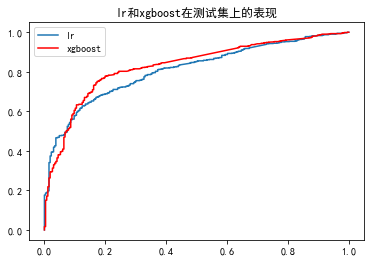

In [162]:
from pylab import mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei'] # ÊåáÂÆöÈªòËÆ§Â≠ó‰Ωì

fpr, tpr, thresholds = roc_curve(y_test,
                                 lr.predict_proba(selected_x_test)[:, 1],
                                 pos_label=1)
fpr_1, tpr_1, thresholds = roc_curve(y_test,
                                 xgb.predict_proba(selected_x_test)[:, 1],
                                 pos_label=1)   
plt.plot(fpr, tpr,label='lr')
plt.plot(fpr_1, tpr_1,color='red',label='xgboost')

plt.legend()
plt.title('lrÂíåxgboostÂú®ÊµãËØïÈõÜ‰∏äÁöÑË°®Áé∞')
plt.show()

In [163]:
#'''ÂØπÊØî‰πã‰∏ãÔºåÂú®Áî®Ê≤°ÊúâÁªèËøáÈááÊ†∑ÁöÑÊï∞ÊçÆÈõÜÔºåËÆ≠ÁªÉÂá∫Êù•ÁöÑÁ°ÆÂÆûÊïàÊûú‰∏ç‰Ω≥'''